<a href="https://colab.research.google.com/github/szeyu/UKMDataChallenge25/blob/main/Trendy_Anomaly_DC24.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Step 1: Upload files
from google.colab import files
# uploaded = files.upload()  # Upload your four files here

In [ ]:
# Step 2: Import libraries
import pandas as pd
import numpy as np

In [ ]:
# Step 3: Load datasets
population_df = pd.read_csv("population_state.csv")
water_access_df = pd.read_csv("water_access.csv")
water_consumption_df = pd.read_csv("water_consumption.csv")
water_production_df = pd.read_csv("water_production.csv")

In [ ]:
# Step 4: Preview dataset structures
print("Population Data:")
print(population_df.head())
print("\nWater Access Data:")
print(water_access_df.head())
print("\nWater Consumption Data:")
print(water_consumption_df.head())
print("\nWater Production Data:")
print(water_production_df.head())

Population Data:
   state        date   sex      age ethnicity  population
0  Johor  1970-01-01  both  overall   overall      1325.6
1  Johor  1970-01-01  both      0-4   overall       210.1
2  Johor  1970-01-01  both      5-9   overall       215.7
3  Johor  1970-01-01  both    10-14   overall       192.2
4  Johor  1970-01-01  both    15-19   overall       152.8

Water Access Data:
      state   strata        date  proportion
0  Malaysia  overall  2000-01-01        92.0
1  Malaysia  overall  2001-01-01        92.7
2  Malaysia  overall  2002-01-01        93.2
3  Malaysia  overall  2003-01-01        93.7
4  Malaysia  overall  2004-01-01        94.0

Water Consumption Data:
      state    sector        date  value
0  Malaysia  domestic  2003-01-01   4394
1  Malaysia  domestic  2004-01-01   4770
2  Malaysia  domestic  2005-01-01   4992
3  Malaysia  domestic  2006-01-01   5025
4  Malaysia  domestic  2007-01-01   5381

Water Production Data:
      state        date  value
0  Malaysia  2000-0

In [ ]:
# Step 5: Drop irrelevant rows and columns
## For population data, we only keep rows where sex == 'both', age == 'overall', ethnicity == 'overall'
population_df = population_df[
    (population_df["sex"] == "both") &
    (population_df["age"] == "overall") &
    (population_df["ethnicity"] == "overall")
]

## For water access, we keep all strata type including overall, rural and urban just in case we want to compare water access between rural and urban areas in the future.

## For water consumption, we keep both sectors for now and will later aggregate
# No filter applied yet

## For water production, no filters needed, but rename value column for clarity
water_production_df.rename(columns={"value": "production_mld"}, inplace=True)

In [ ]:
# Step 6: Rename value columns for clarity across datasets
population_df.rename(columns={"population": "population_thousands"}, inplace=True)
water_access_df.rename(columns={"proportion": "access_pct"}, inplace=True)
water_consumption_df.rename(columns={"value": "consumption_mld"}, inplace=True)

<ipython-input-6-41dd6b49ee17>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  population_df.rename(columns={"population": "population_thousands"}, inplace=True)


In [ ]:
# Step 7: Confirm cleaned datasets
print("\nCleaned Population Data:")
print(population_df.head())
print("\nCleaned Water Access Data:")
print(water_access_df.head())
print("\nCleaned Water Consumption Data:")
print(water_consumption_df.head())
print("\nCleaned Water Production Data:")
print(water_production_df.head())


Cleaned Population Data:
     state        date   sex      age ethnicity  population_thousands
0    Johor  1970-01-01  both  overall   overall                1325.6
48   Johor  1971-01-01  both  overall   overall                1355.4
96   Johor  1972-01-01  both  overall   overall                1385.3
144  Johor  1973-01-01  both  overall   overall                1414.5
192  Johor  1974-01-01  both  overall   overall                1444.4

Cleaned Water Access Data:
      state   strata        date  access_pct
0  Malaysia  overall  2000-01-01        92.0
1  Malaysia  overall  2001-01-01        92.7
2  Malaysia  overall  2002-01-01        93.2
3  Malaysia  overall  2003-01-01        93.7
4  Malaysia  overall  2004-01-01        94.0

Cleaned Water Consumption Data:
      state    sector        date  consumption_mld
0  Malaysia  domestic  2003-01-01             4394
1  Malaysia  domestic  2004-01-01             4770
2  Malaysia  domestic  2005-01-01             4992
3  Malaysia  domest

In [ ]:
# Step 8: Standardize Data Types
print("\n--- Step 8: Standardizing Data Types ---")
# Convert date columns to datetime objects
population_df['date'] = pd.to_datetime(population_df['date'])
water_access_df['date'] = pd.to_datetime(water_access_df['date'])
water_consumption_df['date'] = pd.to_datetime(water_consumption_df['date'])
water_production_df['date'] = pd.to_datetime(water_production_df['date'])

# Ensure numeric columns are numeric (coerce errors to NaN for now)
pop_cols = ['population_thousands']
access_cols = ['access_pct']
consump_cols = ['consumption_mld']
product_cols = ['production_mld']

for col in pop_cols:
    population_df[col] = pd.to_numeric(population_df[col], errors='coerce')
for col in access_cols:
    water_access_df[col] = pd.to_numeric(water_access_df[col], errors='coerce')
for col in consump_cols:
    water_consumption_df[col] = pd.to_numeric(water_consumption_df[col], errors='coerce')
for col in product_cols:
    water_production_df[col] = pd.to_numeric(water_production_df[col], errors='coerce')

print("Data types converted.")
print("Population Info:")
population_df.info()


--- Step 8: Standardizing Data Types ---
Data types converted.
Population Info:
<class 'pandas.core.frame.DataFrame'>
Index: 809 entries, 0 to 256896
Data columns (total 6 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   state                 809 non-null    object        
 1   date                  809 non-null    datetime64[ns]
 2   sex                   809 non-null    object        
 3   age                   809 non-null    object        
 4   ethnicity             809 non-null    object        
 5   population_thousands  809 non-null    float64       
dtypes: datetime64[ns](1), float64(1), object(4)
memory usage: 44.2+ KB


<ipython-input-8-6b2b7e3dd26f>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  population_df['date'] = pd.to_datetime(population_df['date'])
<ipython-input-8-6b2b7e3dd26f>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  population_df[col] = pd.to_numeric(population_df[col], errors='coerce')


In [ ]:
# Step 9: Handle 'Malaysia' Rows & State Consistency
print("\n--- Step 9: Handling 'Malaysia' Rows ---")
# 9a. Calculate and add 'Malaysia' aggregate population data
malaysia_pop_df = population_df.groupby('date')['population_thousands'].sum().reset_index()
malaysia_pop_df['state'] = 'Malaysia'

# Add missing columns with default values
malaysia_pop_df['sex'] = 'both'
malaysia_pop_df['age'] = 'overall'
malaysia_pop_df['ethnicity'] = 'overall'

# Reorder columns to match original df before concatenating
malaysia_pop_df = malaysia_pop_df[population_df.columns]

population_df_aggregated = pd.concat([population_df, malaysia_pop_df], ignore_index=True)
print("Added 'Malaysia' aggregate to population data.")
print(population_df_aggregated[population_df_aggregated['state'] == 'Malaysia'].head())

# 9b. Verify 'Malaysia' exists in other datasets (it should based on info)
print(f"'Malaysia' state in access data: {'Malaysia' in water_access_df['state'].unique()}")
print(f"'Malaysia' state in consumption data: {'Malaysia' in water_consumption_df['state'].unique()}")
print(f"'Malaysia' state in production data: {'Malaysia' in water_production_df['state'].unique()}")

# Use the aggregated population dataframe moving forward
population_df = population_df_aggregated


--- Step 9: Handling 'Malaysia' Rows ---
Added 'Malaysia' aggregate to population data.
        state       date   sex      age ethnicity  population_thousands
809  Malaysia 1970-01-01  both  overall   overall               10881.9
810  Malaysia 1971-01-01  both  overall   overall               11159.6
811  Malaysia 1972-01-01  both  overall   overall               11441.4
812  Malaysia 1973-01-01  both  overall   overall               11719.8
813  Malaysia 1974-01-01  both  overall   overall               12001.1
'Malaysia' state in access data: True
'Malaysia' state in consumption data: True
'Malaysia' state in production data: True


In [ ]:
# Step 10: Address Missing Values (NaNs)
print("\n--- Step 10: Addressing Missing Values ---")
# Check for NaNs introduced by coercion or inherent in data
print("NaN counts before imputation:")
print("Population:", population_df.isnull().sum().sum())
print("Access:", water_access_df.isnull().sum().sum())
print("Consumption:", water_consumption_df.isnull().sum().sum())
print("Production:", water_production_df.isnull().sum().sum())

# Below steps are ignored, since there are no missing values.
# Impute using forward fill (common for time series), grouped by state
# Note: This assumes data is sorted by date for ffill to work correctly per group
# population_df = population_df.sort_values(by=['state', 'date']).groupby('state').ffill()
# water_access_df = water_access_df.sort_values(by=['state', 'strata', 'date']).groupby(['state', 'strata']).ffill()
# water_consumption_df = water_consumption_df.sort_values(by=['state', 'sector', 'date']).groupby(['state', 'sector']).ffill()
# water_production_df = water_production_df.sort_values(by=['state', 'date']).groupby('state').ffill()

# print("\nNaN counts after forward fill (may still have NaNs at start of series):")
# print("Population:", population_df.isnull().sum().sum())
# print("Access:", water_access_df.isnull().sum().sum())
# print("Consumption:", water_consumption_df.isnull().sum().sum())
# print("Production:", water_production_df.isnull().sum().sum())
# Optional: Consider backward fill (bfill) or other methods if NaNs remain at the beginning


--- Step 10: Addressing Missing Values ---
NaN counts before imputation:
Population: 0
Access: 0
Consumption: 0
Production: 0


In [ ]:
# Step 11: Restructure Water Consumption and Access Data
print("\n--- Step 11: Restructuring Consumption & Access Data ---")
# 11a. Pivot Water Consumption data
consumption_pivot = water_consumption_df.pivot_table(index=['date', 'state'],
                                                     columns='sector',
                                                     values='consumption_mld').reset_index()
# Rename pivoted columns for clarity
consumption_pivot.rename(columns={'domestic': 'consump_domestic_mld',
                                  'nondomestic': 'consump_nondomestic_mld'}, inplace=True)
# Calculate total consumption, handle potential NaNs from pivot (assume NaN means 0 for that sector)
consumption_pivot['consump_total_mld'] = consumption_pivot['consump_domestic_mld'].fillna(0) + \
                                         consumption_pivot['consump_nondomestic_mld'].fillna(0)
print("Pivoted water consumption data:")
print(consumption_pivot.head())

# 11b. Pivot Water Access data (for urban/rural comparison later)
access_pivot = water_access_df.pivot_table(index=['date', 'state'],
                                           columns='strata',
                                           values='access_pct').reset_index()
# Rename pivoted columns
access_pivot.rename(columns={'overall': 'access_overall_pct',
                             'urban': 'access_urban_pct',
                             'rural': 'access_rural_pct'}, inplace=True)
print("\nPivoted water access data:")
print(access_pivot.head())


--- Step 11: Restructuring Consumption & Access Data ---
Pivoted water consumption data:
sector       date     state  consump_domestic_mld  consump_nondomestic_mld  \
0      2003-01-01     Johor                 560.0                    246.0   
1      2003-01-01     Kedah                 388.0                    114.0   
2      2003-01-01  Kelantan                  94.0                     35.0   
3      2003-01-01  Malaysia                4394.0                   2281.0   
4      2003-01-01    Melaka                 153.0                    143.0   

sector  consump_total_mld  
0                   806.0  
1                   502.0  
2                   129.0  
3                  6675.0  
4                   296.0  

Pivoted water access data:
strata       date     state  access_overall_pct  access_rural_pct  \
0      2000-01-01     Johor                99.0              98.0   
1      2000-01-01     Kedah                96.0              97.0   
2      2000-01-01  Kelantan           

In [ ]:
# Step 12: Merge Datasets
print("\n--- Step 12: Merging Datasets ---")
# Start with population data
merged_df = population_df.copy()

# Merge pivoted access data
merged_df = pd.merge(merged_df, access_pivot, on=['date', 'state'], how='outer')

# Merge pivoted consumption data
merged_df = pd.merge(merged_df, consumption_pivot, on=['date', 'state'], how='outer')

# Merge production data
merged_df = pd.merge(merged_df, water_production_df, on=['date', 'state'], how='outer')

# Sort final dataframe for better readability
merged_df = merged_df.sort_values(by=['state', 'date']).reset_index(drop=True)

print("Datasets merged. Shape of merged_df:", merged_df.shape)
print("Merged data head:")
print(merged_df.head())
print("\nCheck NaNs after merge (expected due to differing date ranges/coverage):")
print(merged_df.isnull().sum())


--- Step 12: Merging Datasets ---
Datasets merged. Shape of merged_df: (864, 13)
Merged data head:
   state       date   sex      age ethnicity  population_thousands  \
0  Johor 1970-01-01  both  overall   overall                1325.6   
1  Johor 1971-01-01  both  overall   overall                1355.4   
2  Johor 1972-01-01  both  overall   overall                1385.3   
3  Johor 1973-01-01  both  overall   overall                1414.5   
4  Johor 1974-01-01  both  overall   overall                1444.4   

   access_overall_pct  access_rural_pct  access_urban_pct  \
0                 NaN               NaN               NaN   
1                 NaN               NaN               NaN   
2                 NaN               NaN               NaN   
3                 NaN               NaN               NaN   
4                 NaN               NaN               NaN   

   consump_domestic_mld  consump_nondomestic_mld  consump_total_mld  \
0                   NaN                  

In [ ]:
# Step 13: Feature Engineering
print("\n--- Step 13: Feature Engineering ---")
# Ensure population is in actual numbers, not thousands
merged_df['population'] = merged_df['population_thousands'] * 1000

# Calculate Consumption Per Capita (handle potential division by zero or NaN population)
merged_df['consump_per_capita_mld'] = merged_df['consump_total_mld'] / merged_df['population']
# Replace infinities (if any) from zero population with NaN
merged_df['consump_per_capita_mld'].replace([np.inf, -np.inf], np.nan, inplace=True)


# Calculate Production vs. Consumption Ratio (handle potential division by zero)
merged_df['prod_consump_ratio'] = merged_df['production_mld'] / merged_df['consump_total_mld']
# Replace infinities (if any) from zero consumption with NaN, handle 0/0 as NaN
merged_df['prod_consump_ratio'].replace([np.inf, -np.inf], np.nan, inplace=True)
merged_df['prod_consump_ratio'] = merged_df.apply(lambda row: row['production_mld'] / row['consump_total_mld'] if row['consump_total_mld'] != 0 else np.nan, axis=1)


# Calculate Water Access Disparity (Urban % - Rural %)
merged_df['access_disparity_pct'] = merged_df['access_urban_pct'] - merged_df['access_rural_pct']

# Simple Water Stress Indicator (Example: Ratio of Total Consumption to Production)
# Lower ratio means less stress FROM PRODUCTION perspective. High ratio = stress.
merged_df['stress_indicator_consump_prod'] = merged_df['consump_total_mld'] / merged_df['production_mld']
merged_df['stress_indicator_consump_prod'].replace([np.inf, -np.inf], np.nan, inplace=True) # Handle division by zero production
merged_df['stress_indicator_consump_prod'] = merged_df.apply(lambda row: row['consump_total_mld'] / row['production_mld'] if row['production_mld'] != 0 else np.nan, axis=1)


# Display only rows where there are no NaNs in the engineered features
print("Engineered features (No NaNs):")
print(
    merged_df[
        ['date', 'state', 'population', 'consump_per_capita_mld',
         'prod_consump_ratio', 'access_disparity_pct', 'stress_indicator_consump_prod']
    ].dropna().head()
)



--- Step 13: Feature Engineering ---
Engineered features (No NaNs):
         date  state  population  consump_per_capita_mld  prod_consump_ratio  \
33 2003-01-01  Johor   2954000.0                0.000273            1.387097   
34 2004-01-01  Johor   3014600.0                0.000277            1.201198   
35 2005-01-01  Johor   3074400.0                0.000278            1.171729   
36 2006-01-01  Johor   3134400.0                0.000287            1.516129   
37 2007-01-01  Johor   3193500.0                0.000298            1.455404   

    access_disparity_pct  stress_indicator_consump_prod  
33                   1.0                       0.720930  
34                   2.0                       0.832502  
35                   1.0                       0.853440  
36                   1.0                       0.659574  
37                   0.5                       0.687094  


<ipython-input-13-0eea36147b66>:9: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  merged_df['consump_per_capita_mld'].replace([np.inf, -np.inf], np.nan, inplace=True)
<ipython-input-13-0eea36147b66>:15: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].m

In [ ]:
# Step 14: Outlier Detection (Example using Z-score)
print("\n--- Step 14: Outlier Detection (Example) ---")
# Calculate Z-scores for a key feature like consumption per capita
# Note: We calculate per capita in MLD / person. Convert to Litres/person/day?
# 1 MLD = 1,000,000 L/day. Population is individuals.
# So, per capita MLD = (MLD * 1e6) / population (L/person/day)
merged_df['consump_per_capita_lpd'] = (merged_df['consump_total_mld'] * 1_000_000) / merged_df['population']
merged_df['consump_per_capita_lpd'].replace([np.inf, -np.inf], np.nan, inplace=True) # Handle division by zero


feature_for_outlier = 'consump_per_capita_lpd'
# Fill NaNs temporarily for Z-score calculation if needed, or calculate ignoring NaNs
mean_val = merged_df[feature_for_outlier].mean()
std_val = merged_df[feature_for_outlier].std()
merged_df['z_score_' + feature_for_outlier] = (merged_df[feature_for_outlier] - mean_val) / std_val

# Identify potential outliers (e.g., Z-score > 3 or < -3)
outliers = merged_df[np.abs(merged_df['z_score_' + feature_for_outlier]) > 3]
print(f"Potential outliers identified using Z-score > 3 for '{feature_for_outlier}': {len(outliers)} rows")
if len(outliers) > 0:
    print("Example outliers:")
    print(outliers[['date', 'state', feature_for_outlier, 'z_score_' + feature_for_outlier]].head())
# Note: This just identifies them. Actions (investigate, cap, remove) depend on context.


--- Step 14: Outlier Detection (Example) ---
Potential outliers identified using Z-score > 3 for 'consump_per_capita_lpd': 0 rows


<ipython-input-14-fd59c2ce3a93>:8: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  merged_df['consump_per_capita_lpd'].replace([np.inf, -np.inf], np.nan, inplace=True) # Handle division by zero


In [ ]:
# Step 15: Final Review of Preprocessed Data
print("\n--- Step 15: Final Review ---")
print("Final DataFrame Info:")
merged_df.info()
print("Final DataFrame Header:")
print(merged_df.head())

print("\nFinal DataFrame Description (Numeric Columns):")
# Select only numeric columns for describe to avoid warnings
print(merged_df.describe(include=np.number))

# Optional: Save the preprocessed data
merged_df.to_csv("preprocessed_water_data.csv", index=False)


--- Step 15: Final Review ---
Final DataFrame Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 864 entries, 0 to 863
Data columns (total 20 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   state                           864 non-null    object        
 1   date                            864 non-null    datetime64[ns]
 2   sex                             864 non-null    object        
 3   age                             864 non-null    object        
 4   ethnicity                       864 non-null    object        
 5   population_thousands            864 non-null    float64       
 6   access_overall_pct              345 non-null    float64       
 7   access_rural_pct                345 non-null    float64       
 8   access_urban_pct                345 non-null    float64       
 9   consump_domestic_mld            300 non-null    float64       
 10  consump_nondomestic_m

## Data Analysis / Visualization
### 1. Overall National Trends

Analyzing National Trends for the common period: 2003 - 2022


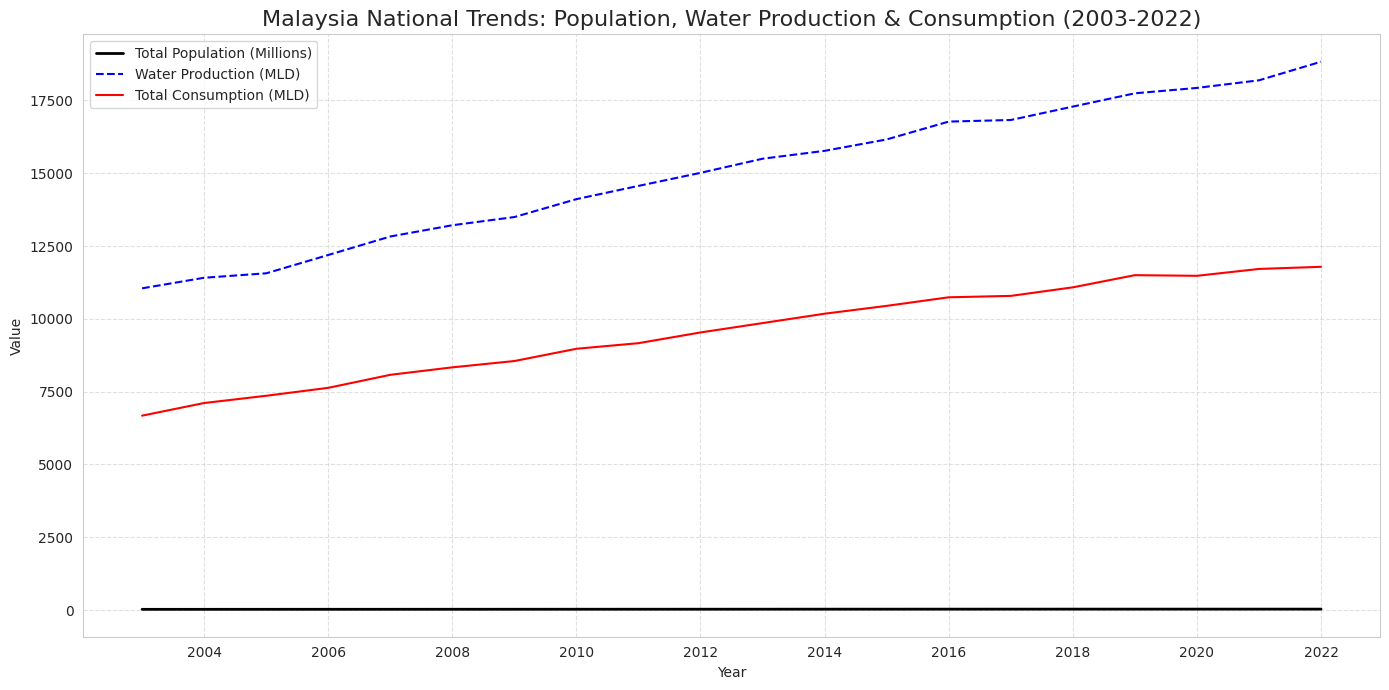

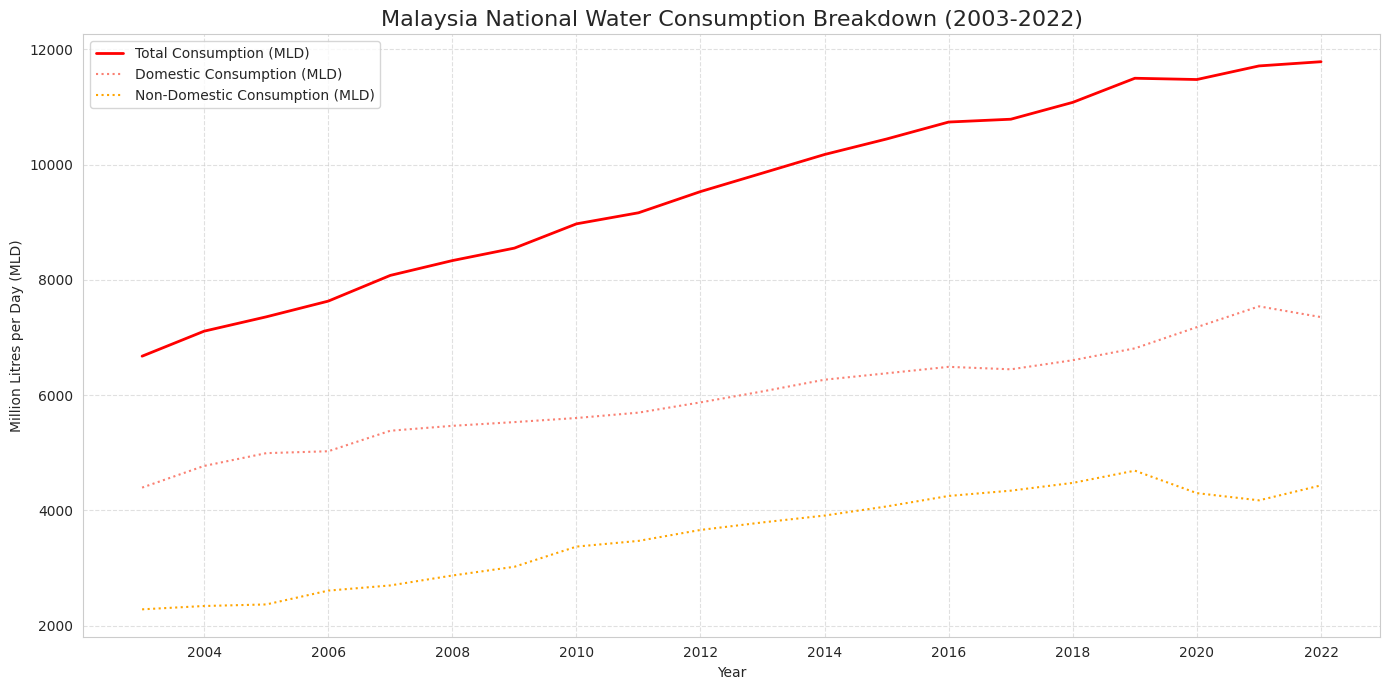

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Ensure merged_df is loaded and preprocessed
# If loading from CSV:
# merged_df = pd.read_csv("preprocessed_water_data.csv")
# merged_df['date'] = pd.to_datetime(merged_df['date'])


# Filter for national data ('Malaysia')
malaysia_df = merged_df[merged_df['state'] == 'Malaysia'].sort_values('date').copy()

# --- Determine the common date range ---
# Keep only rows where Population, Production, and Total Consumption are not NaN
# This filters to the period where all three data streams overlap for Malaysia
malaysia_common_period_df = malaysia_df.dropna(subset=['population', 'production_mld', 'consump_total_mld']).copy()

# Identify the start and end years of this common period
start_year = malaysia_common_period_df['date'].min().year
end_year = malaysia_common_period_df['date'].max().year

print(f"Analyzing National Trends for the common period: {start_year} - {end_year}")


# Set plot style
sns.set_style("whitegrid")

# --- Plot 1: Population, Production, and Total Consumption ---
plt.figure(figsize=(14, 7)) # Adjust figure size if needed

# Plot Population (scale to Millions)
plt.plot(malaysia_common_period_df['date'], malaysia_common_period_df['population'] / 1e6, label='Total Population (Millions)', color='black', linewidth=2)

# Plot Water Production and Total Consumption
plt.plot(malaysia_common_period_df['date'], malaysia_common_period_df['production_mld'], label='Water Production (MLD)', color='blue', linestyle='--')
plt.plot(malaysia_common_period_df['date'], malaysia_common_period_df['consump_total_mld'], label='Total Consumption (MLD)', color='red')

plt.ylabel('Value') # Generic label as units differ
plt.xlabel('Year')
plt.title(f'Malaysia National Trends: Population, Water Production & Consumption ({start_year}-{end_year})', fontsize=16)
plt.legend()
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

# Save the first figure
# plt.savefig("national_trends_pop_prod_consump.png", dpi=300)


# --- Plot 2: Total, Domestic, and Non-Domestic Consumption ---
# Ensure common period data is also non-null for domestic/nondomestic consumption
malaysia_consumption_detail_df = malaysia_df.dropna(subset=['consump_total_mld', 'consump_domestic_mld', 'consump_nondomestic_mld']).copy()

# Use the same start and end year as the first plot for consistency, or find the common range for consumption types
# Let's stick to the common range for Pop, Prod, Consump (2003-2022) as per request
malaysia_consumption_detail_df = malaysia_consumption_detail_df[
    (malaysia_consumption_detail_df['date'].dt.year >= start_year) &
    (malaysia_consumption_detail_df['date'].dt.year <= end_year)
]


plt.figure(figsize=(14, 7)) # Separate figure for the second plot

plt.plot(malaysia_consumption_detail_df['date'], malaysia_consumption_detail_df['consump_total_mld'], label='Total Consumption (MLD)', color='red', linewidth=2)
plt.plot(malaysia_consumption_detail_df['date'], malaysia_consumption_detail_df['consump_domestic_mld'], label='Domestic Consumption (MLD)', color='salmon', linestyle=':')
plt.plot(malaysia_consumption_detail_df['date'], malaysia_consumption_detail_df['consump_nondomestic_mld'], label='Non-Domestic Consumption (MLD)', color='orange', linestyle=':')

plt.ylabel('Million Litres per Day (MLD)')
plt.xlabel('Year')
plt.title(f'Malaysia National Water Consumption Breakdown ({start_year}-{end_year})', fontsize=16)
plt.legend()
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

# Save the second figure
# plt.savefig("national_trends_consump_breakdown.png", dpi=300)

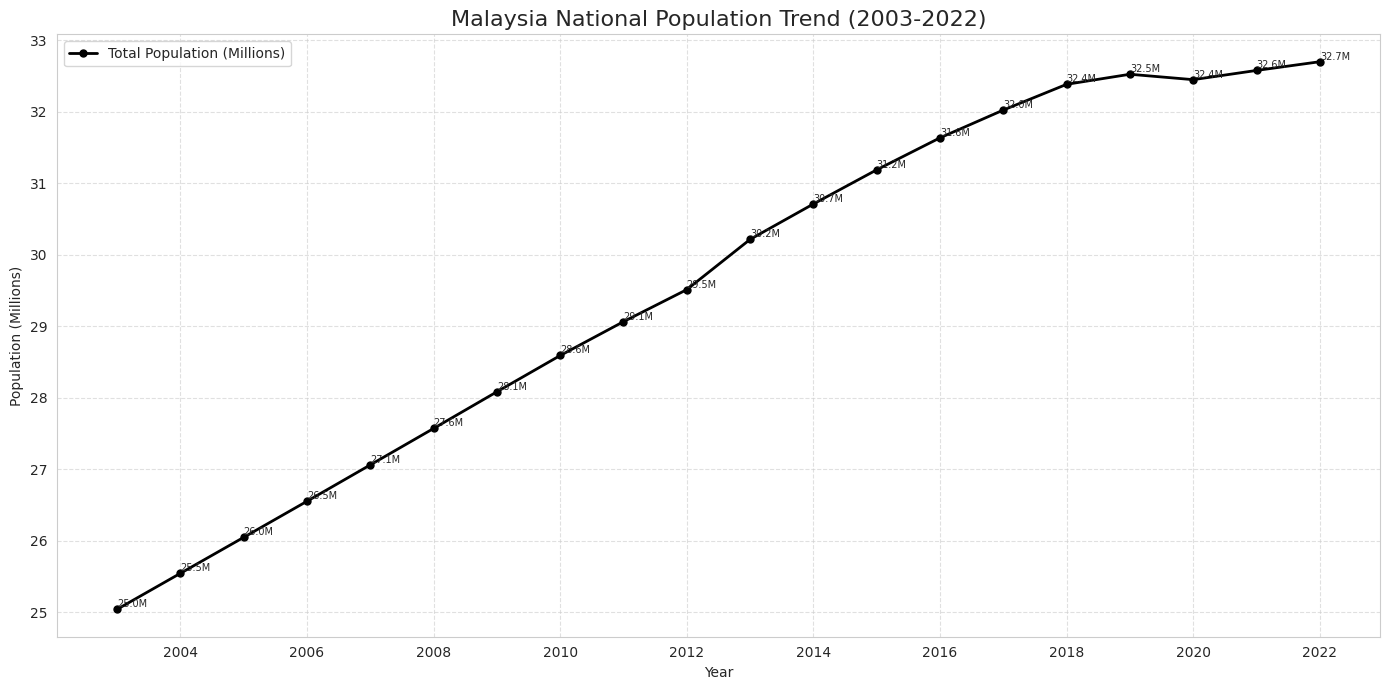

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

# Ensure merged_df is loaded and preprocessed
# merged_df = pd.read_csv("preprocessed_water_data.csv")
# merged_df['date'] = pd.to_datetime(merged_df['date'])

# Filter for national data ('Malaysia')
malaysia_df = merged_df[merged_df['state'] == 'Malaysia'].sort_values('date').copy()

# --- Determine the common date range (re-calculate or use known range) ---
malaysia_common_period_df = malaysia_df.dropna(subset=['population', 'production_mld', 'consump_total_mld']).copy()
start_year = malaysia_common_period_df['date'].min().year
end_year = malaysia_common_period_df['date'].max().year

malaysia_pop_common = malaysia_df[
    (malaysia_df['date'].dt.year >= start_year) &
    (malaysia_df['date'].dt.year <= end_year)
].dropna(subset=['population']).copy() # Ensure population is not NaN in this range


# Set plot style
sns.set_style("whitegrid")

# --- Plot: Malaysia Population Trend (Common Period) ---
plt.figure(figsize=(14, 7))
ax = plt.gca()

ax.plot(malaysia_pop_common['date'], malaysia_pop_common['population'] / 1e6, label='Total Population (Millions)', color='black', linewidth=2, marker='o', markersize=5)

# --- Add Data Labels ---
for x, y in zip(malaysia_pop_common['date'], malaysia_pop_common['population'] / 1e6):
    ax.text(x, y, f'{y:,.1f}M', fontsize=7, ha='left', va='bottom')

ax.set_ylabel('Population (Millions)')
ax.set_xlabel('Year')
ax.set_title(f'Malaysia National Population Trend ({start_year}-{end_year})', fontsize=16)
ax.legend()
ax.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

# Save the figure
# plt.savefig("national_trends_population_only.png", dpi=300)

Creating Dual Y-Axis Plot for the common period: 2003 - 2022


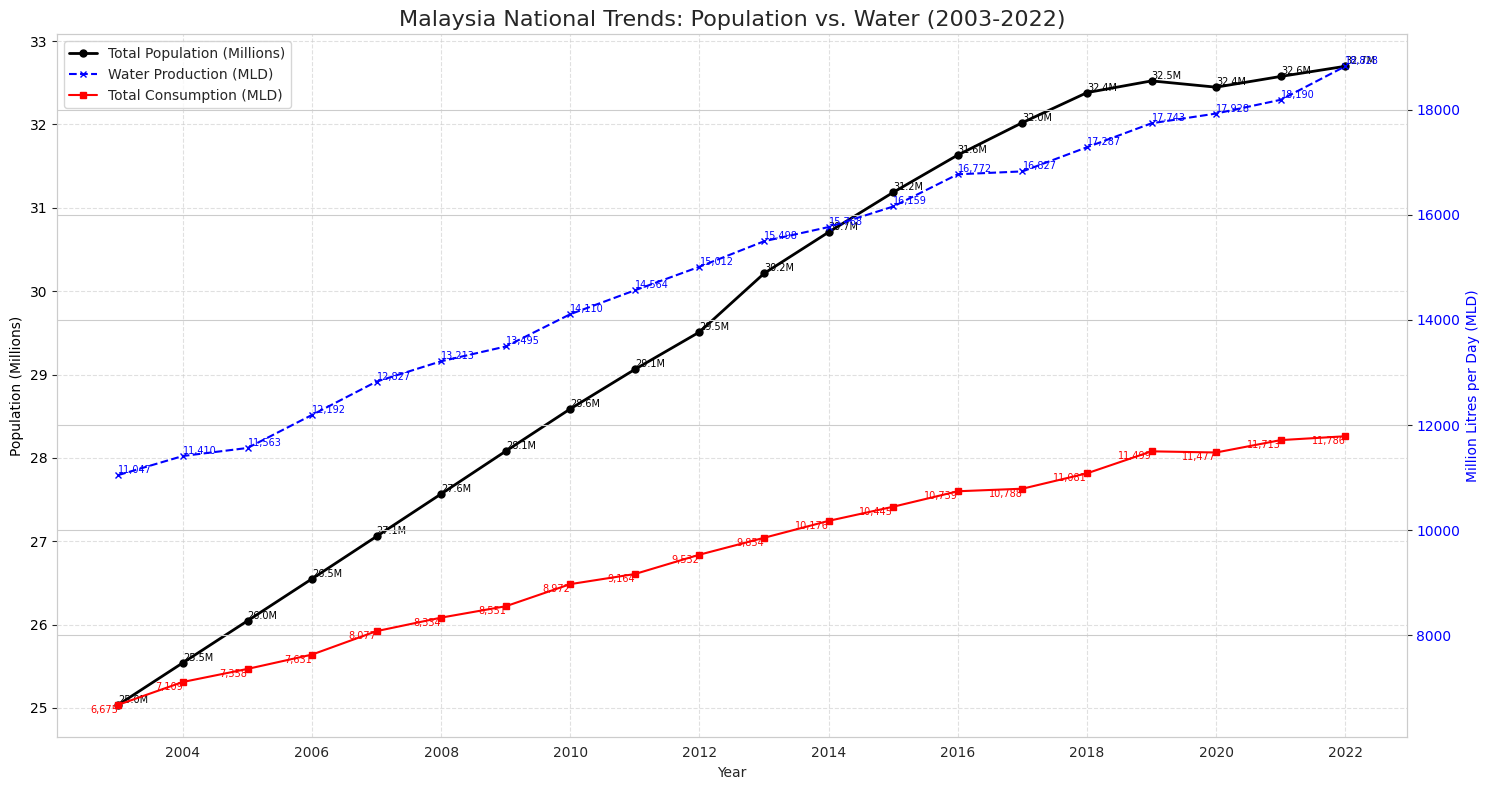

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

# Ensure merged_df is loaded and preprocessed
# merged_df = pd.read_csv("preprocessed_water_data.csv")
# merged_df['date'] = pd.to_datetime(merged_df['date'])

# Filter for national data ('Malaysia')
malaysia_df = merged_df[merged_df['state'] == 'Malaysia'].sort_values('date').copy()

# --- Determine the common date range (re-calculate or use known range) ---
malaysia_common_period_df = malaysia_df.dropna(subset=['population', 'production_mld', 'consump_total_mld']).copy()
start_year = malaysia_common_period_df['date'].min().year
end_year = malaysia_common_period_df['date'].max().year

print(f"Creating Dual Y-Axis Plot for the common period: {start_year} - {end_year}")


# Set plot style
sns.set_style("whitegrid")

# --- Plot: Dual Y-Axis (Population vs. Water Trends) ---
plt.figure(figsize=(15, 8))
ax1 = plt.gca() # Get the primary axes for Population

# Plot Population on the left y-axis
line_pop, = ax1.plot(malaysia_common_period_df['date'], malaysia_common_period_df['population'] / 1e6, label='Total Population (Millions)', color='black', linewidth=2, marker='o', markersize=5)
ax1.set_ylabel('Population (Millions)', color='black')
ax1.tick_params(axis='y', labelcolor='black')
ax1.set_xlabel('Year') # X-axis label is shared


# Create a second y-axis sharing the same x-axis
ax2 = ax1.twinx()

# Plot Water Production and Total Consumption on the right y-axis
line_prod, = ax2.plot(malaysia_common_period_df['date'], malaysia_common_period_df['production_mld'], label='Water Production (MLD)', color='blue', linestyle='--', marker='x', markersize=5)
line_consump, = ax2.plot(malaysia_common_period_df['date'], malaysia_common_period_df['consump_total_mld'], label='Total Consumption (MLD)', color='red', marker='s', markersize=5)

ax2.set_ylabel('Million Litres per Day (MLD)', color='blue') # Label the second y-axis
ax2.tick_params(axis='y', labelcolor='blue')


# --- Add Data Labels for Dual Y-Axis Plot ---
# Population labels (using ax1 scale)
for x, y in zip(malaysia_common_period_df['date'], malaysia_common_period_df['population'] / 1e6):
    ax1.text(x, y, f'{y:,.1f}M', fontsize=7, ha='left', va='bottom', color='black')

# Production labels (using ax2 scale)
for x, y in zip(malaysia_common_period_df['date'], malaysia_common_period_df['production_mld']):
     ax2.text(x, y, f'{y:,.0f}', fontsize=7, ha='left', va='bottom', color='blue') # Use ax2 text, specify color

# Consumption labels (using ax2 scale)
for x, y in zip(malaysia_common_period_df['date'], malaysia_common_period_df['consump_total_mld']):
     ax2.text(x, y, f'{y:,.0f}', fontsize=7, ha='right', va='top', color='red') # Use ax2 text, specify color


# Combine legends from both axes
lines = [line_pop, line_prod, line_consump]
labels = [l.get_label() for l in lines]
ax1.legend(lines, labels, loc='upper left') # Place legend using ax1

ax1.set_title(f'Malaysia National Trends: Population vs. Water ({start_year}-{end_year})', fontsize=16)
ax1.grid(True, linestyle='--', alpha=0.6) # Grid often only applies to one axis, typically ax1

plt.tight_layout()
plt.show()

# Save the figure
# plt.savefig("national_trends_dual_axis.png", dpi=300)

Analyzing National Trends for the common period: 2003 - 2022


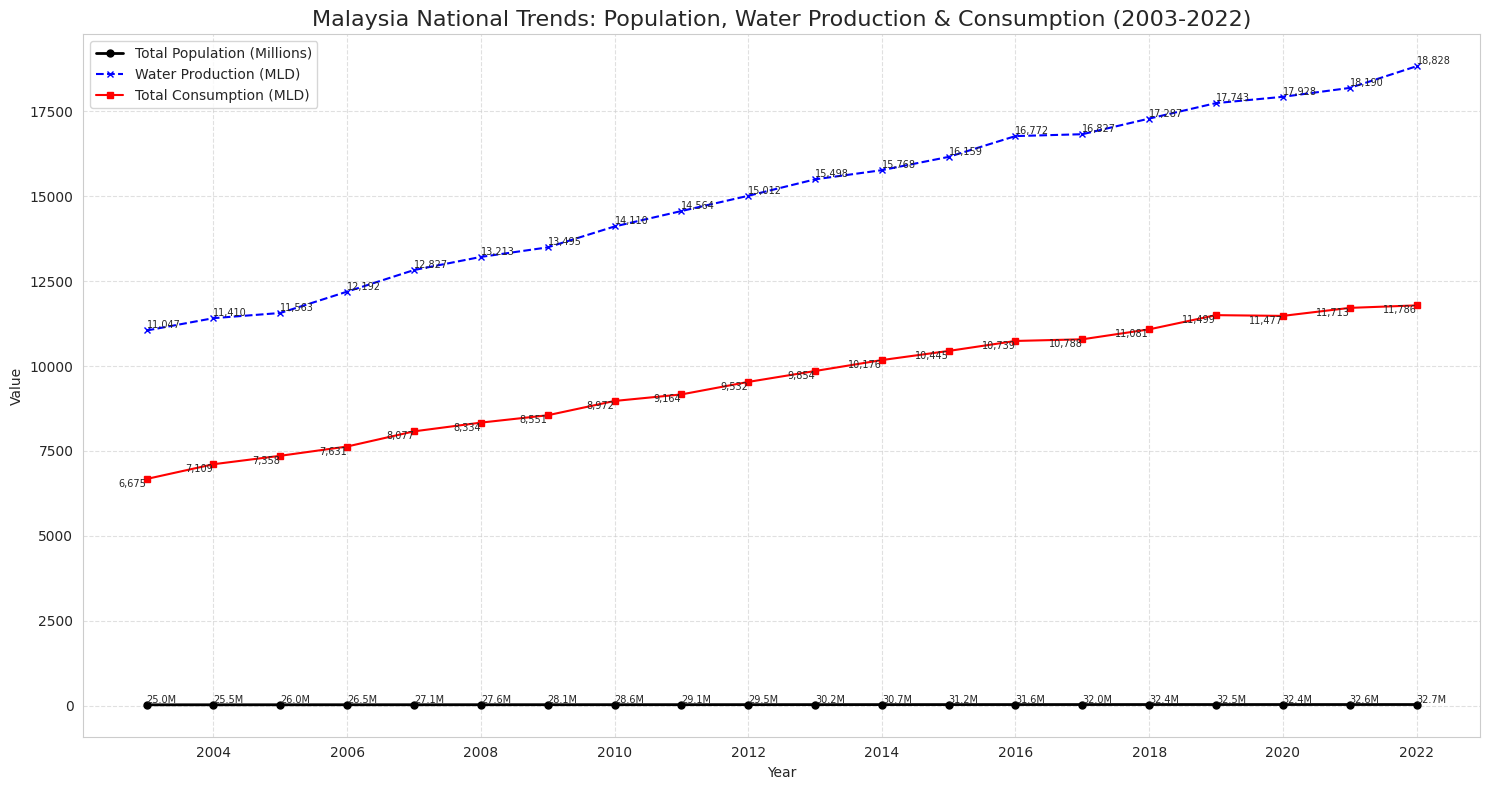

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np # Import numpy for handling NaNs/Infs

# Ensure merged_df is loaded and preprocessed
# If loading from CSV:
# merged_df = pd.read_csv("preprocessed_water_data.csv")
# merged_df['date'] = pd.to_datetime(merged_df['date'])


# Filter for national data ('Malaysia')
malaysia_df = merged_df[merged_df['state'] == 'Malaysia'].sort_values('date').copy()

# --- Determine the common date range ---
# Keep only rows where Population, Production, and Total Consumption are not NaN
# This filters to the period where all three data streams overlap for Malaysia
malaysia_common_period_df = malaysia_df.dropna(subset=['population', 'production_mld', 'consump_total_mld']).copy()

# Identify the start and end years of this common period
start_year = malaysia_common_period_df['date'].min().year
end_year = malaysia_common_period_df['date'].max().year

print(f"Analyzing National Trends for the common period: {start_year} - {end_year}")


# Set plot style
sns.set_style("whitegrid")

# --- Plot 1: Population, Production, and Total Consumption ---
plt.figure(figsize=(15, 8)) # Adjust figure size
ax1 = plt.gca() # Get current axes

# Plot Population (scale to Millions)
ax1.plot(malaysia_common_period_df['date'], malaysia_common_period_df['population'] / 1e6, label='Total Population (Millions)', color='black', linewidth=2, marker='o', markersize=5) # Added markers

# Plot Water Production and Total Consumption
ax1.plot(malaysia_common_period_df['date'], malaysia_common_period_df['production_mld'], label='Water Production (MLD)', color='blue', linestyle='--', marker='x', markersize=5) # Added markers
ax1.plot(malaysia_common_period_df['date'], malaysia_common_period_df['consump_total_mld'], label='Total Consumption (MLD)', color='red', marker='s', markersize=5) # Added markers

# --- Add Data Labels for Plot 1 ---
# Population labels
for x, y in zip(malaysia_common_period_df['date'], malaysia_common_period_df['population'] / 1e6):
    ax1.text(x, y, f'{y:,.1f}M', fontsize=7, ha='left', va='bottom') # Label Population in Millions, 1 decimal place, with comma

# Production labels
for x, y in zip(malaysia_common_period_df['date'], malaysia_common_period_df['production_mld']):
     ax1.text(x, y, f'{y:,.0f}', fontsize=7, ha='left', va='bottom') # Label Production, 0 decimal places, with comma

# Consumption labels
for x, y in zip(malaysia_common_period_df['date'], malaysia_common_period_df['consump_total_mld']):
     ax1.text(x, y, f'{y:,.0f}', fontsize=7, ha='right', va='top') # Label Consumption, 0 decimal places, with comma, adjusted position

ax1.set_ylabel('Value') # Generic label as units differ
ax1.set_xlabel('Year')
ax1.set_title(f'Malaysia National Trends: Population, Water Production & Consumption ({start_year}-{end_year})', fontsize=16)
ax1.legend()
ax1.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

# Save the first figure
# plt.savefig("national_trends_pop_prod_consump.png", dpi=300)

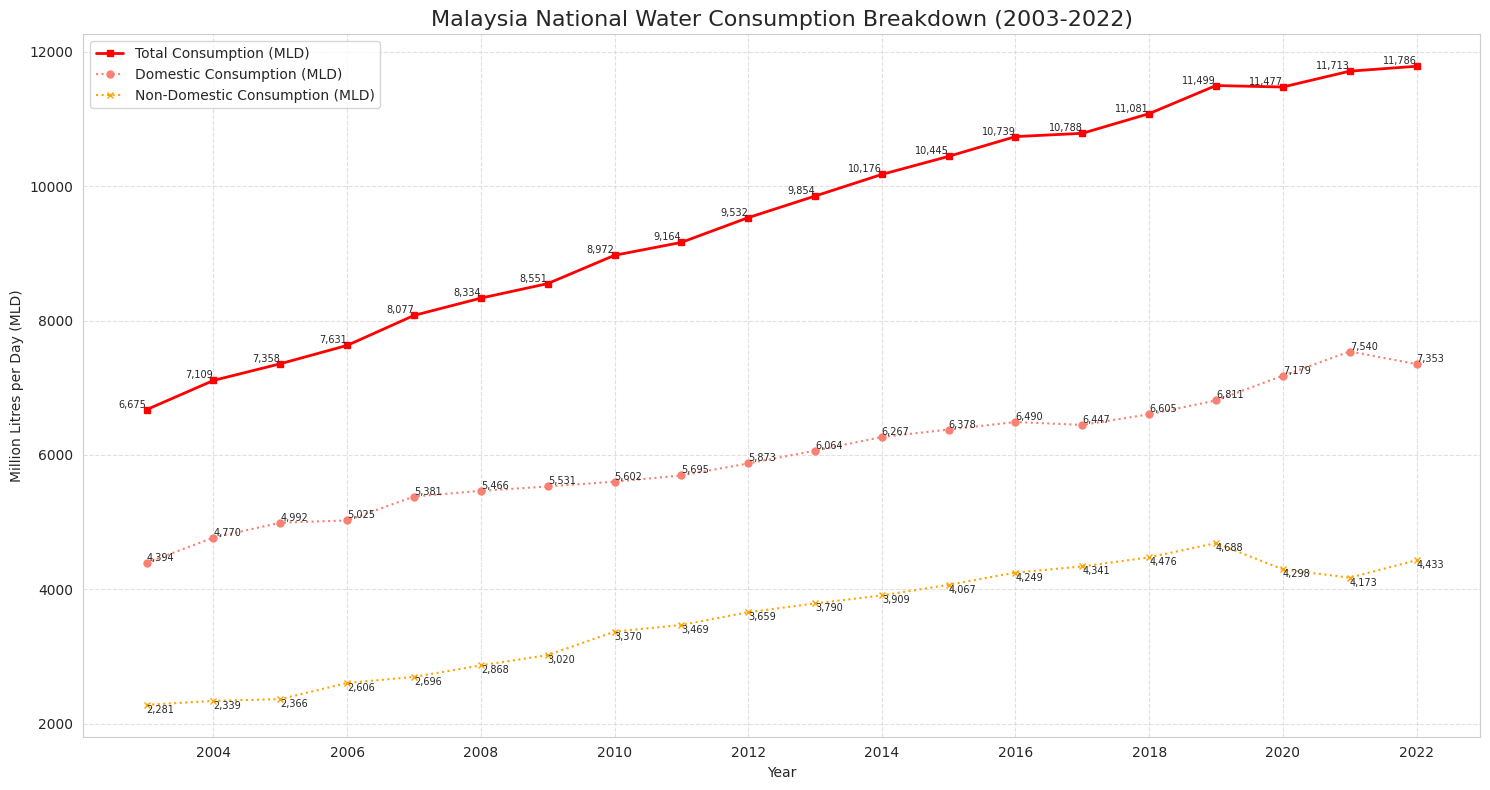

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

# Ensure merged_df is loaded and preprocessed from the previous block or loaded from CSV
# merged_df = pd.read_csv("preprocessed_water_data.csv")
# merged_df['date'] = pd.to_datetime(merged_df['date'])

# Filter for national data ('Malaysia') - assuming malaysia_df is still available or re-filter
malaysia_df = merged_df[merged_df['state'] == 'Malaysia'].sort_values('date').copy()

# Use the common date range found in the previous block (2003-2022)
# Filter data for consumption breakdown for the same period
malaysia_consumption_detail_df = malaysia_df.dropna(subset=['consump_total_mld', 'consump_domestic_mld', 'consump_nondomestic_mld']).copy()

start_year = malaysia_consumption_detail_df['date'].min().year # Re-calculate or use value from above if running separately
end_year = malaysia_consumption_detail_df['date'].max().year # Re-calculate or use value from above

malaysia_consumption_detail_df = malaysia_consumption_detail_df[
    (malaysia_consumption_detail_df['date'].dt.year >= start_year) &
    (malaysia_consumption_detail_df['date'].dt.year <= end_year)
]


# Set plot style
sns.set_style("whitegrid")

# --- Plot 2: Total, Domestic, and Non-Domestic Consumption ---
plt.figure(figsize=(15, 8)) # Separate figure for the second plot, adjust size
ax2 = plt.gca() # Get current axes

ax2.plot(malaysia_consumption_detail_df['date'], malaysia_consumption_detail_df['consump_total_mld'], label='Total Consumption (MLD)', color='red', linewidth=2, marker='s', markersize=5) # Added marker
ax2.plot(malaysia_consumption_detail_df['date'], malaysia_consumption_detail_df['consump_domestic_mld'], label='Domestic Consumption (MLD)', color='salmon', linestyle=':', marker='o', markersize=5) # Added marker
ax2.plot(malaysia_consumption_detail_df['date'], malaysia_consumption_detail_df['consump_nondomestic_mld'], label='Non-Domestic Consumption (MLD)', color='orange', linestyle=':', marker='x', markersize=5) # Added marker


# --- Add Data Labels for Plot 2 ---
# Total Consumption labels
for x, y in zip(malaysia_consumption_detail_df['date'], malaysia_consumption_detail_df['consump_total_mld']):
    ax2.text(x, y, f'{y:,.0f}', fontsize=7, ha='right', va='bottom') # Label Total Consumption

# Domestic Consumption labels
for x, y in zip(malaysia_consumption_detail_df['date'], malaysia_consumption_detail_df['consump_domestic_mld']):
     ax2.text(x, y, f'{y:,.0f}', fontsize=7, ha='left', va='bottom') # Label Domestic Consumption

# Non-Domestic Consumption labels
for x, y in zip(malaysia_consumption_detail_df['date'], malaysia_consumption_detail_df['consump_nondomestic_mld']):
     ax2.text(x, y, f'{y:,.0f}', fontsize=7, ha='left', va='top') # Label Non-Domestic Consumption, adjusted position


ax2.set_ylabel('Million Litres per Day (MLD)')
ax2.set_xlabel('Year')
ax2.set_title(f'Malaysia National Water Consumption Breakdown ({start_year}-{end_year})', fontsize=16)
ax2.legend()
ax2.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

# Save the second figure
# plt.savefig("national_trends_consump_breakdown.png", dpi=300)

### 2. State-Level Water Access (Choropleth Map)

In [ ]:
# This requires geopandas and potentially a GeoJSON file for Malaysian states
# Install if needed: !pip install geopandas
import geopandas as gpd

# --- You need a GeoJSON or Shapefile of Malaysian states ---
# Example: Download from a source like https://github.com/datautama/malaysia-maps
# Or search for "malaysia states geojson"
# Let's assume you have 'malaysia_states.geojson'

try:
    # Load the GeoJSON file
    map_gdf = gpd.read_file("malaysia_states.json") # Replace with your file path

    # Select latest year data (assuming 2022-01-01 is the latest)
    latest_year = merged_df['date'].max()
    latest_data = merged_df[merged_df['date'] == latest_year]
    print(map_gdf['state_column_name'].unique())
    print(latest_data['state'].unique())

    # Merge map data with our latest water access data
    # Ensure state names match between GeoJSON properties and our 'state' column
    # You might need to adjust names (e.g., 'W.P. Kuala Lumpur' vs 'Kuala Lumpur')
    # Check map_gdf['state_column_name'].unique() and latest_data['state'].unique()
    # Example renaming in map_gdf (adjust based on your file):
    # map_gdf['state'] = map_gdf['state_column_name'].replace({'W.P. Kuala Lumpur': 'W.P. Kuala Lumpur', ...})

    # Perform the merge (adjust 'state_column_name' based on your GeoJSON)
    merged_map_data = map_gdf.merge(latest_data, left_on='state', right_on='state', how='left') # Use the matching state column name from map_gdf

    # Plotting the Choropleth map
    fig, ax = plt.subplots(1, 1, figsize=(12, 12))
    merged_map_data.plot(column='access_overall_pct',
                         ax=ax,
                         legend=True,
                         cmap='Blues', # Color map
                         linewidth=0.8,
                         edgecolor='0.8',
                         missing_kwds={"color": "lightgrey", # Color for states with missing data
                                       "label": "Missing data"})

    ax.set_title(f'Access to Treated Water (%) by State - {latest_year.year}', fontsize=16)
    ax.set_axis_off() # Hide axis
    plt.show()

    # Save the figure
    # fig.savefig("map_water_access.png", dpi=300)

except FileNotFoundError:
    print("GeoJSON file for Malaysian states not found. Skipping Choropleth map.")
except KeyError as e:
    print(f"KeyError during map merge: {e}. Check state column names in GeoJSON and DataFrame.")
    print("Map GDF States:", map_gdf['state'].unique() if 'state' in map_gdf else "Column 'state' not found") # Adjust column name if needed
    print("Latest Data States:", latest_data['state'].unique())

DataSourceError: malaysia_states.json: No such file or directory

### 3. Urban vs. Rural Water Access Disparity (Bar Chart)

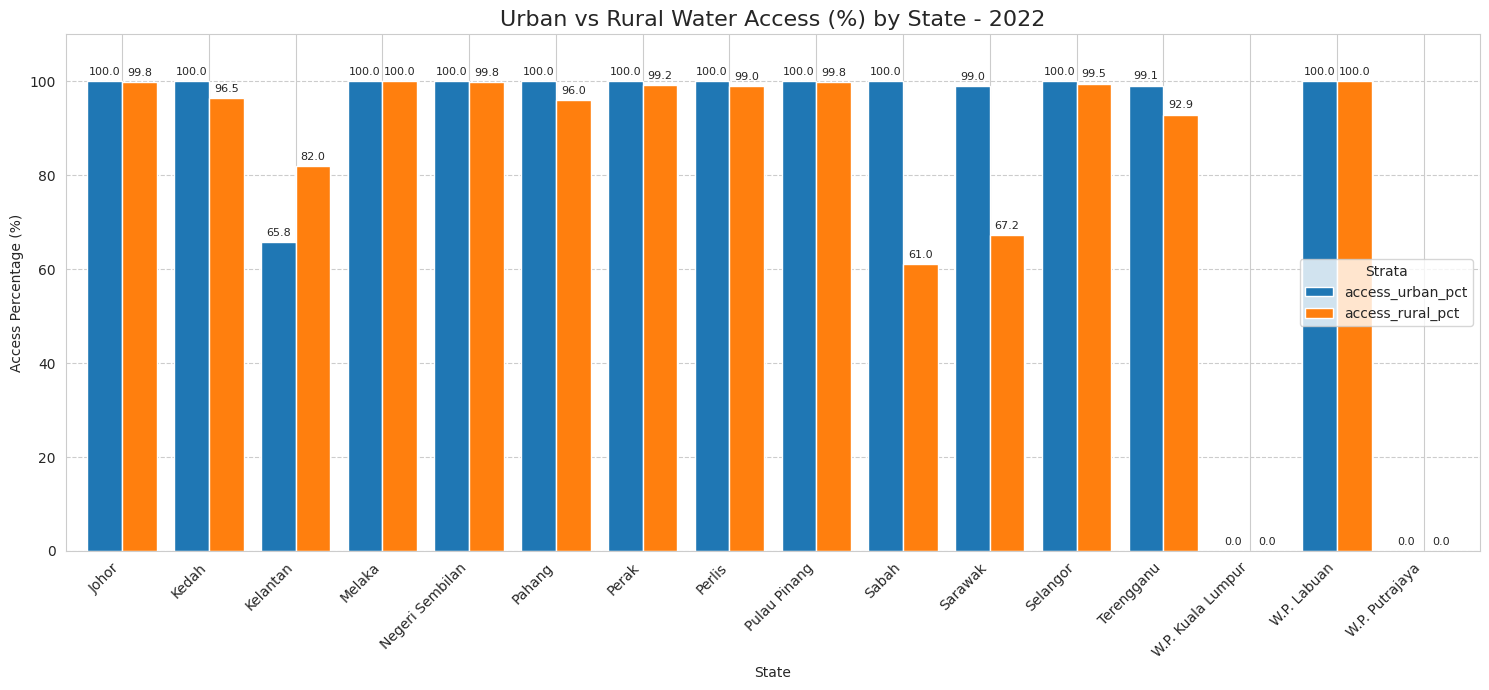

In [ ]:
# Select latest year where water access data is available
latest_year = merged_df[merged_df['access_urban_pct'].notna() & merged_df['access_rural_pct'].notna()]['date'].max()

# Filter data for that year and exclude national aggregate
latest_data_access = merged_df[
    (merged_df['date'] == latest_year) & (merged_df['state'] != 'Malaysia')
]

# Prepare data for plotting
plot_data = latest_data_access[['state', 'access_urban_pct', 'access_rural_pct']].set_index('state')

# Plotting
ax = plot_data.plot(kind='bar', figsize=(15, 7), width=0.8)
plt.title(f'Urban vs Rural Water Access (%) by State - {latest_year.year}', fontsize=16)
plt.ylabel('Access Percentage (%)')
plt.xlabel('State')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Strata')
plt.ylim(0, 110) # Slightly increase y-limit to make space for labels
plt.grid(axis='y', linestyle='--')

# --- Add Data Labels ---
for container in ax.containers:
    ax.bar_label(container, fmt='%.1f', padding=3, fontsize=8) # Add labels with 1 decimal place, small font, slight padding

plt.tight_layout()
plt.show()

### 4. State Comparison Snapshot (Bubble Chart)

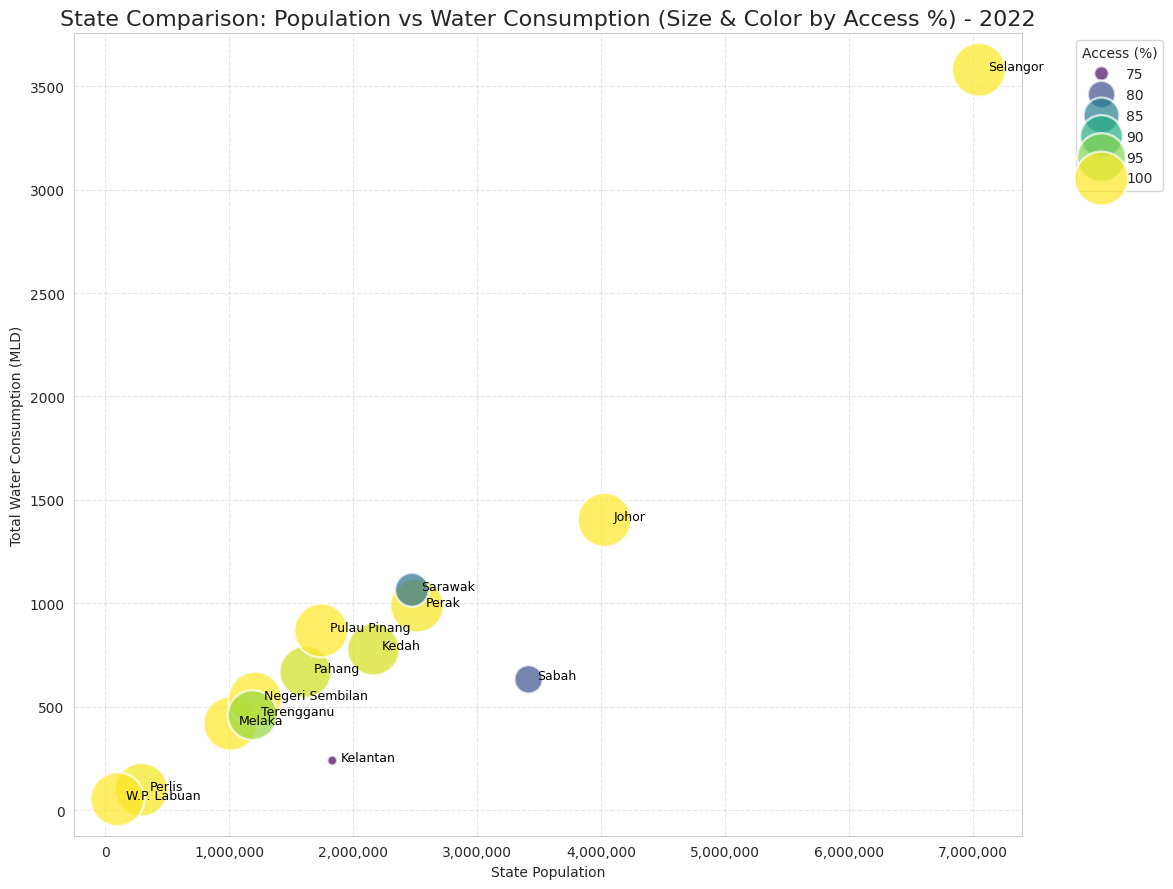

In [ ]:
# Derive latest year with valid access_overall_pct values
latest_year = merged_df[merged_df['access_overall_pct'].notna()]['date'].max()

# Filter for that specific year and exclude national aggregate
latest_data_states = merged_df[(merged_df['date'] == latest_year) & (merged_df['state'] != 'Malaysia')]

# Plotting
plt.figure(figsize=(14, 9))
sns.scatterplot(
    data=latest_data_states,
    x='population',
    y='consump_total_mld',
    size='access_overall_pct',
    hue='access_overall_pct',
    sizes=(50, 1500),
    palette='viridis',
    alpha=0.7
)

# Add state labels
for i in range(latest_data_states.shape[0]):
    plt.text(
        x=latest_data_states['population'].iloc[i] + 0.01 * latest_data_states['population'].max(),
        y=latest_data_states['consump_total_mld'].iloc[i],
        s=latest_data_states['state'].iloc[i],
        fontdict=dict(color='black', size=9)
    )

plt.title(f'State Comparison: Population vs Water Consumption (Size & Color by Access %) - {latest_year.year}', fontsize=16)
plt.xlabel('State Population')
plt.ylabel('Total Water Consumption (MLD)')
plt.gca().xaxis.set_major_formatter(plt.FuncFormatter(lambda x, p: format(int(x), ',')))
plt.legend(title='Access (%)', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout(rect=[0, 0, 0.85, 1])
plt.show()


### 5. 5. Per Capita Consumption Trends (Heatmap)


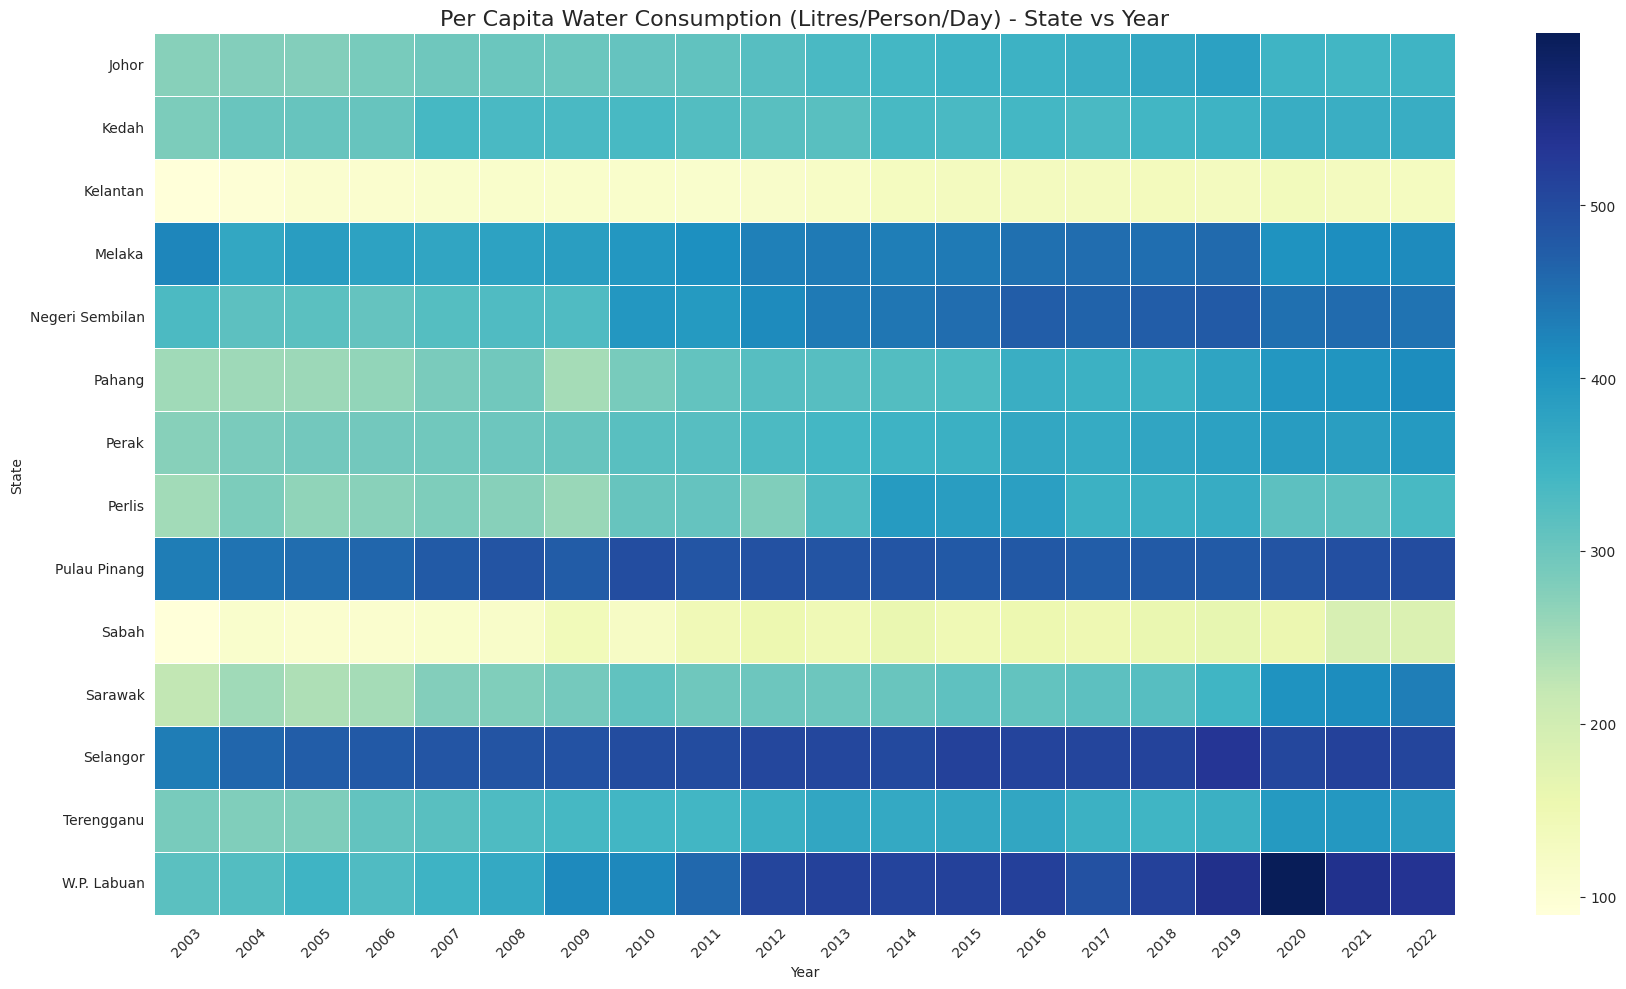

In [ ]:
# --- Heatmap: State vs Year for Per Capita Consumption ---
# Pivot data: index=state, columns=year, values=per capita consumption
heatmap_data = merged_df[merged_df['state'] != 'Malaysia'].copy() # Exclude 'Malaysia'
heatmap_data['year'] = heatmap_data['date'].dt.year # Extract year
heatmap_pivot = heatmap_data.pivot_table(index='state', columns='year', values='consump_per_capita_lpd')

plt.figure(figsize=(18, 10))
sns.heatmap(heatmap_pivot, cmap="YlGnBu", linewidths=.5, annot=False, fmt=".0f") # Or annot=True if values fit
plt.title('Per Capita Water Consumption (Litres/Person/Day) - State vs Year', fontsize=16)
plt.xlabel('Year')
plt.ylabel('State')
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()
# plt.savefig("heatmap_per_capita_consumption.png", dpi=300)


# --- Line Plot: Per Capita Consumption for Selected States ---
# Choose states (e.g., highest/lowest population, specific regions)
# Example: Select a few diverse states + Malaysia for context
# selected_states = ['Johor', 'Selangor', 'Kelantan', 'Sabah', 'Malaysia']
# lineplot_data = merged_df[merged_df['state'].isin(selected_states)].sort_values('date')

# plt.figure(figsize=(14, 7))
# sns.lineplot(data=lineplot_data, x='date', y='consump_per_capita_lpd', hue='state', linewidth=2)
# plt.title('Per Capita Water Consumption Trends (Selected States)', fontsize=16)
# plt.xlabel('Year')
# plt.ylabel('Litres per Person per Day (LPD)')
# plt.legend(title='State')
# plt.grid(True, linestyle='--', alpha=0.7)
# plt.tight_layout()
# plt.show()
# plt.savefig("line_per_capita_consumption_selected.png", dpi=300)

## Prediction Model

In [ ]:
# --- Data Preparation for Forecasting ---
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt # Included for potential ACF/PACF inspection if needed, also for plotting later
import seaborn as sns # For plotting later
from statsmodels.tsa.arima.model import ARIMA # Base ARIMA model
from statsmodels.tsa.stattools import adfuller # For checking stationarity if needed
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf # For identifying ARIMA orders if not using auto_arima

# --- Install pmdarima ---
# This library helps automatically select ARIMA parameters
!pip install pmdarima --quiet
from pmdarima import auto_arima

# Ensure merged_df is loaded and preprocessed
# If loading from CSV:
# merged_df = pd.read_csv("preprocessed_water_data.csv")
# merged_df['date'] = pd.to_datetime(merged_df['date'])

# Define the states and metrics for forecasting
states_to_forecast = ['Malaysia', 'Selangor', 'Sabah']
metrics_to_forecast = ['population', 'production_mld', 'consump_total_mld']

# Define the historical period for training (2003-2022)
start_date = '2003-01-01'
end_date = '2022-01-01' # The last date of your historical data

# Filter data for selected states and the historical period
forecast_df_historical = merged_df[
    merged_df['state'].isin(states_to_forecast) &
    (merged_df['date'] >= start_date) &
    (merged_df['date'] <= end_date)
].copy() # Use .copy() to avoid SettingWithCopyWarning

# Ensure the target columns are not null in the selected historical data
forecast_df_historical.dropna(subset=metrics_to_forecast, inplace=True)

print(f"Prepared historical data for forecasting from {start_date} to {end_date} for states: {states_to_forecast}")
print("Historical data head:")
print(forecast_df_historical.head())
print("\nMissing values in historical data (should be 0 for forecasting columns):")
print(forecast_df_historical[metrics_to_forecast].isnull().sum())


# --- Develop a Forecasting Function using auto_arima ---

def forecast_time_series(ts_data: pd.Series, forecast_horizon: int):
    """
    Fits an auto_arima model to a time series and forecasts future values.

    Args:
        ts_data (pd.Series): Historical time series data with DatetimeIndex.
        forecast_horizon (int): Number of periods (years) to forecast.

    Returns:
        pd.DataFrame: Combined DataFrame with historical and predicted data.
                      Includes 'date', 'value', 'state', and 'DataType'.
    """
    if ts_data.empty:
        print(f"Warning: Empty time series data for {ts_data.name}. Skipping forecast.")
        return pd.DataFrame()

    print(f"\nFitting auto_arima for: {ts_data.name}")

    # Fit auto_arima model - set seasonal=False for annual data
    # suppress_warnings=True to avoid many convergence warnings
    model = auto_arima(ts_data,
                       seasonal=False,
                       stepwise=True, # Use stepwise approach to find optimal model faster
                       suppress_warnings=True,
                       error_action='ignore',
                       trace=True) # Set trace=True to see the search process

    print(f"Auto_arima found order: {model.order}")

    # Make future forecasts
    forecast_values, conf_int = model.predict(n_periods=forecast_horizon, return_conf_int=True)

    # Create future dates
    last_date = ts_data.index.max()
    future_dates = pd.date_range(start=last_date + pd.DateOffset(years=1), periods=forecast_horizon, freq='AS') # Annual Start frequency

    # Prepare results for combining
    historical_df = ts_data.reset_index()
    historical_df.columns = ['date', 'value']
    historical_df['DataType'] = 'Historical'

    forecast_df = pd.DataFrame({'date': future_dates, 'value': forecast_values})
    forecast_df['DataType'] = 'Predicted'

    # Combine historical and forecast data
    combined_df = pd.concat([historical_df, forecast_df], ignore_index=True)
    combined_df['state'] = ts_data.name.split('_')[0] # Extract state name from series name
    combined_df['metric'] = ts_data.name.split('_')[1] # Extract metric name from series name

    return combined_df

# --- Generate Forecasts for Each Location and Metric ---

forecast_horizon_years = 13 # Forecast from 2023 to 2035 (2035 - 2022 = 13)
all_forecast_results = []

for state in states_to_forecast:
    for metric in metrics_to_forecast:
        # Create a time series for the current state and metric
        # Ensure index is date and name is informative
        ts_data = forecast_df_historical[forecast_df_historical['state'] == state].set_index('date')[metric].rename(f"{state}_{metric}")

        # Handle potential scaling difference for 'population' for auto_arima if needed
        # auto_arima can handle the scale, but if values are huge, sometimes scaling helps stability.
        # However, for annual data over ~20 points, it's likely fine without scaling.
        # We will work with the original scale here as per previous data prep.

        # Generate forecast
        forecast_result = forecast_time_series(ts_data, forecast_horizon_years)
        if not forecast_result.empty:
             all_forecast_results.append(forecast_result)

# --- Consolidate Forecast Data ---
if all_forecast_results:
    all_forecasts_combined = pd.concat(all_forecast_results, ignore_index=True)

    # Pivot the data back to separate columns per metric for easier plotting by metric
    # This step structures data so you have one row per date/state, with columns for pop, prod, consump
    # However, for plotting by metric (one plot for pop, one for prod, one for consump),
    # it's easier to keep them somewhat separated initially or use melted format.

    # Let's create the three master DataFrames directly from the combined list
    population_forecasts_df = all_forecasts_combined[all_forecasts_combined['metric'] == 'population'].copy()
    production_forecasts_df = all_forecasts_combined[all_forecasts_combined['metric'] == 'production_mld'].copy()
    consumption_forecasts_df = all_forecasts_combined[all_forecasts_combined['metric'] == 'consump_total_mld'].copy()

    # Rename 'value' column in each DataFrame to the metric name for clarity
    population_forecasts_df.rename(columns={'value': 'population'}, inplace=True)
    production_forecasts_df.rename(columns={'value': 'production_mld'}, inplace=True)
    consumption_forecasts_df.rename(columns={'value': 'consump_total_mld'}, inplace=True)


    print("\n--- Sample of Consolidated Population Forecasts ---")
    print(population_forecasts_df.head())
    print(population_forecasts_df.tail())

    print("\n--- Sample of Consolidated Production Forecasts ---")
    print(production_forecasts_df.head())
    print(production_forecasts_df.tail())

    print("\n--- Sample of Consolidated Consumption Forecasts ---")
    print(consumption_forecasts_df.head())
    print(consumption_forecasts_df.tail())

    # --- Save the consolidated data for later visualization ---
    population_forecasts_df.to_csv("population_forecasts.csv", index=False)
    production_forecasts_df.to_csv("production_forecasts.csv", index=False)
    consumption_forecasts_df.to_csv("consumption_forecasts.csv", index=False)

    print("\nForecast data saved to CSV files.")

else:
    print("No forecast results were generated.")


# --- Next Steps: Visualization ---
print("\nForecast data prepared. The next step is to visualize these results.")
print("You now have three DataFrames/CSV files ready for plotting historical vs. predicted trends:")
print(" - population_forecasts_df / population_forecasts.csv")
print(" - production_forecasts_df / production_forecasts.csv")
print(" - consumption_forecasts_df / consumption_forecasts.csv")

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 23.7 MB/s eta 0:00:00


ValueError: numpy.dtype size changed, may indicate binary incompatibility. Expected 96 from C header, got 88 from PyObject

In [ ]:
# --- Data Preparation and Forecasting using statsmodels ARIMA ---

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt # Will be used for plotting later
import seaborn as sns # Will be used for plotting later

# Import the base ARIMA model from statsmodels
# This should hopefully work without the numpy conflict encountered with pmdarima
from statsmodels.tsa.arima.model import ARIMA

# We are skipping pmdarima import and installation due to conflicts
# from pmdarima import auto_arima


# Ensure merged_df is loaded and preprocessed
# If loading from CSV after a runtime restart, uncomment the lines below:
# merged_df = pd.read_csv("preprocessed_water_data.csv")
# merged_df['date'] = pd.to_datetime(merged_df['date'])

# Define the states and metrics for forecasting
states_to_forecast = ['Malaysia', 'Selangor', 'Sabah']
metrics_to_forecast = ['population', 'production_mld', 'consump_total_mld']

# Define the historical period for training (2003-2022)
start_date = '2003-01-01'
end_date = '2022-01-01' # The last date of your historical data

# Filter data for selected states and the historical period
forecast_df_historical = merged_df[
    merged_df['state'].isin(states_to_forecast) &
    (merged_df['date'] >= start_date) &
    (merged_df['date'] <= end_date)
].copy() # Use .copy() to avoid SettingWithCopyWarning

# Ensure the target columns are not null in the selected historical data within this range
# This is crucial for time series modeling
for metric in metrics_to_forecast:
    if forecast_df_historical[metric].isnull().any():
         print(f"Warning: Missing values found for {metric} in the historical period ({start_date} to {end_date}) for selected states.")
         print("Rows with NaNs will be dropped for this metric's forecast.")
         # We will drop NaNs when extracting the time series for each specific forecast below

print(f"Prepared historical data for forecasting from {start_date} to {end_date} for states: {states_to_forecast}")
print("Historical data head:")
print(forecast_df_historical.head())


# --- Develop a Forecasting Function using statsmodels ARIMA ---

def forecast_time_series_manual_arima(ts_data: pd.Series, forecast_horizon: int, order: tuple = (1, 1, 0)):
    """
    Fits a statsmodels ARIMA model with a specified order and forecasts future values.

    Args:
        ts_data (pd.Series): Historical time series data with DatetimeIndex.
                             Should not contain NaNs if possible for ARIMA fitting.
        forecast_horizon (int): Number of periods (years) to forecast.
        order (tuple): The (p, d, q) order for the ARIMA model.

    Returns:
        pd.DataFrame: Combined DataFrame with historical and predicted data.
                      Includes 'date', 'value', 'state', and 'DataType'.
                      Returns empty DataFrame if fitting fails.
    """
    if ts_data.empty:
        print(f"Warning: Empty time series data for {ts_data.name}. Skipping forecast.")
        return pd.DataFrame()

    # Drop any remaining NaNs just before fitting, as ARIMA cannot handle them
    ts_data = ts_data.dropna()
    if ts_data.empty:
         print(f"Warning: Time series {ts_data.name} became empty after dropping NaNs. Skipping forecast.")
         return pd.DataFrame()

    print(f"\nFitting ARIMA {order} for: {ts_data.name}")

    try:
        # Fit ARIMA model with specified order
        model = ARIMA(ts_data, order=order)
        model_fit = model.fit()

        # print(model_fit.summary()) # Optional: Uncomment to print model summary

        # Make future forecasts
        # The predict method needs the start and end index *relative to the training data's index*.
        # If training data has N points (index 0 to N-1), forecasting H steps ahead means predicting indices N to N+H-1.
        start_forecast_idx = len(ts_data)
        end_forecast_idx = len(ts_data) + forecast_horizon - 1

        forecast_values = model_fit.predict(start=start_forecast_idx, end=end_forecast_idx)


        # Create future dates starting from the year *after* the last historical date
        last_date = ts_data.index.max()
        future_dates = pd.date_range(start=last_date + pd.DateOffset(years=1), periods=forecast_horizon, freq='AS') # Annual Start frequency

        # Align forecast values with future dates - crucial!
        # Ensure the index of forecast_values matches future_dates before combining
        if len(forecast_values) == len(future_dates):
             forecast_values.index = future_dates
        else:
             print(f"Warning: Mismatch between forecast values ({len(forecast_values)}) and future dates ({len(future_dates)}) for {ts_data.name}. Skipping combining.")
             return pd.DataFrame()


        # Prepare results for combining
        historical_df = ts_data.reset_index()
        historical_df.columns = ['date', 'value']
        historical_df['DataType'] = 'Historical'

        # Convert forecast_values Series to DataFrame
        forecast_df = forecast_values.reset_index()
        forecast_df.columns = ['date', 'value']
        forecast_df['DataType'] = 'Predicted'

        # Combine historical and forecast data
        combined_df = pd.concat([historical_df, forecast_df], ignore_index=True)
        combined_df['state'] = ts_data.name.split('_')[0] # Extract state name from series name
        combined_df['metric'] = ts_data.name.split('_')[1] # Extract metric name from series name

        return combined_df

    except Exception as e:
        print(f"Error fitting or forecasting ARIMA for {ts_data.name} with order {order}: {e}")
        # Often errors occur if data is too short or does not vary enough for the chosen order
        print("Consider trying a simpler ARIMA order (e.g., (1,1,0) or (0,1,0)).")
        return pd.DataFrame()


# --- Generate Forecasts for Each Location and Metric ---

forecast_horizon_years = 13 # Forecast from 2023 up to and including 2035 (2035 - 2022 = 13)
all_forecast_results = []

# Define a default ARIMA order (p, d, q)
# (5, 1, 0) is a common starting point for annual data with a trend.
# If you encounter errors or unrealistic forecasts, try (1,1,0) or (0,1,0) as simpler alternatives.
arima_order = (5, 1, 0)


for state in states_to_forecast:
    for metric in metrics_to_forecast:
        # Extract the time series for the current state and metric
        # Set date as index and ensure it's a Series with a name
        ts_data = forecast_df_historical[forecast_df_historical['state'] == state].set_index('date')[metric].rename(f"{state}_{metric}")

        # Generate forecast using manual ARIMA
        # Pass the chosen arima_order
        forecast_result = forecast_time_series_manual_arima(ts_data, forecast_horizon_years, order=arima_order)

        if not forecast_result.empty:
             all_forecast_results.append(forecast_result)
        else:
             print(f"Skipping consolidation for {state}_{metric} due to forecast failure.")


# --- Consolidate Forecast Data ---
if all_forecast_results:
    all_forecasts_combined = pd.concat(all_forecast_results, ignore_index=True)

    # Create the three master DataFrames directly from the combined list
    population_forecasts_df = all_forecasts_combined[all_forecasts_combined['metric'] == 'population'].copy()
    production_forecasts_df = all_forecasts_combined[all_forecasts_combined['metric'] == 'production_mld'].copy()
    consumption_forecasts_df = all_forecasts_combined[all_forecasts_combined['metric'] == 'consump_total_mld'].copy()

    # Rename 'value' column in each DataFrame to the metric name for clarity
    population_forecasts_df.rename(columns={'value': 'population'}, inplace=True)
    production_forecasts_df.rename(columns={'value': 'production_mld'}, inplace=True)
    consumption_forecasts_df.rename(columns={'value': 'consump_total_mld'}, inplace=True)


    print("\n--- Sample of Consolidated Population Forecasts ---")
    print(population_forecasts_df.head())
    print(population_forecasts_df.tail())

    print("\n--- Sample of Consolidated Production Forecasts ---")
    print(production_forecasts_df.head())
    print(production_forecasts_df.tail())

    print("\n--- Sample of Consolidated Consumption Forecasts ---")
    print(consumption_forecasts_df.head())
    print(consumption_forecasts_df.tail())

    # --- Save the consolidated data for later visualization ---
    population_forecasts_df.to_csv("population_forecasts.csv", index=False)
    production_forecasts_df.to_csv("production_forecasts.csv", index=False)
    consumption_forecasts_df.to_csv("consumption_forecasts.csv", index=False)

    print("\nForecast data saved to CSV files: population_forecasts.csv, production_forecasts.csv, consumption_forecasts.csv")

else:
    print("\nNo forecast results were successfully generated for any time series.")


# --- Next Steps: Visualization ---
print("\nForecast data preparation complete.")
print("The next step is to visualize these results (Historical vs. Predicted) using the saved CSVs or the DataFrames in memory.")

Prepared historical data for forecasting from 2003-01-01 to 2022-01-01 for states: ['Malaysia', 'Selangor', 'Sabah']
Historical data head:
        state       date   sex      age ethnicity  population_thousands  \
198  Malaysia 2003-01-01  both  overall   overall               25038.0   
199  Malaysia 2004-01-01  both  overall   overall               25541.3   
200  Malaysia 2005-01-01  both  overall   overall               26045.5   
201  Malaysia 2006-01-01  both  overall   overall               26549.9   
202  Malaysia 2007-01-01  both  overall   overall               27058.3   

     access_overall_pct  access_rural_pct  access_urban_pct  \
198                93.7              86.2              98.2   
199                94.0              87.0              97.0   
200                95.0              92.0              98.0   
201                94.8              91.0              97.8   
202                90.5              84.6              96.5   

     consump_domestic_mld  cons

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency YS-JAN will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency YS-JAN will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency YS-JAN will be used.
  self._init_dates(dates, freq)
<ipython-input-33-54c9751f03ea>:96: FutureWarning: 'AS' is deprecated and will be removed in a future version, please use 'YS' instead.
  future_dates = pd.date_range(start=last_date + pd.DateOffset(years=1), periods=forecast_horizon, freq='AS') # Annual Start frequency
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency in


Fitting ARIMA (5, 1, 0) for: Selangor_population

Fitting ARIMA (5, 1, 0) for: Selangor_production_mld

Fitting ARIMA (5, 1, 0) for: Selangor_consump_total_mld


<ipython-input-33-54c9751f03ea>:96: FutureWarning: 'AS' is deprecated and will be removed in a future version, please use 'YS' instead.
  future_dates = pd.date_range(start=last_date + pd.DateOffset(years=1), periods=forecast_horizon, freq='AS') # Annual Start frequency
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency YS-JAN will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency YS-JAN will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency YS-JAN will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationa


Fitting ARIMA (5, 1, 0) for: Sabah_population

Fitting ARIMA (5, 1, 0) for: Sabah_production_mld

Fitting ARIMA (5, 1, 0) for: Sabah_consump_total_mld

--- Sample of Consolidated Population Forecasts ---
        date  population    DataType     state      metric
0 2003-01-01  25038000.0  Historical  Malaysia  population
1 2004-01-01  25541300.0  Historical  Malaysia  population
2 2005-01-01  26045500.0  Historical  Malaysia  population
3 2006-01-01  26549900.0  Historical  Malaysia  population
4 2007-01-01  27058300.0  Historical  Malaysia  population
          date    population   DataType  state      metric
226 2031-01-01  3.374480e+06  Predicted  Sabah  population
227 2032-01-01  3.374404e+06  Predicted  Sabah  population
228 2033-01-01  3.374345e+06  Predicted  Sabah  population
229 2034-01-01  3.374309e+06  Predicted  Sabah  population
230 2035-01-01  3.374290e+06  Predicted  Sabah  population

--- Sample of Consolidated Production Forecasts ---
Empty DataFrame
Columns: [date, pr

<ipython-input-33-54c9751f03ea>:96: FutureWarning: 'AS' is deprecated and will be removed in a future version, please use 'YS' instead.
  future_dates = pd.date_range(start=last_date + pd.DateOffset(years=1), periods=forecast_horizon, freq='AS') # Annual Start frequency


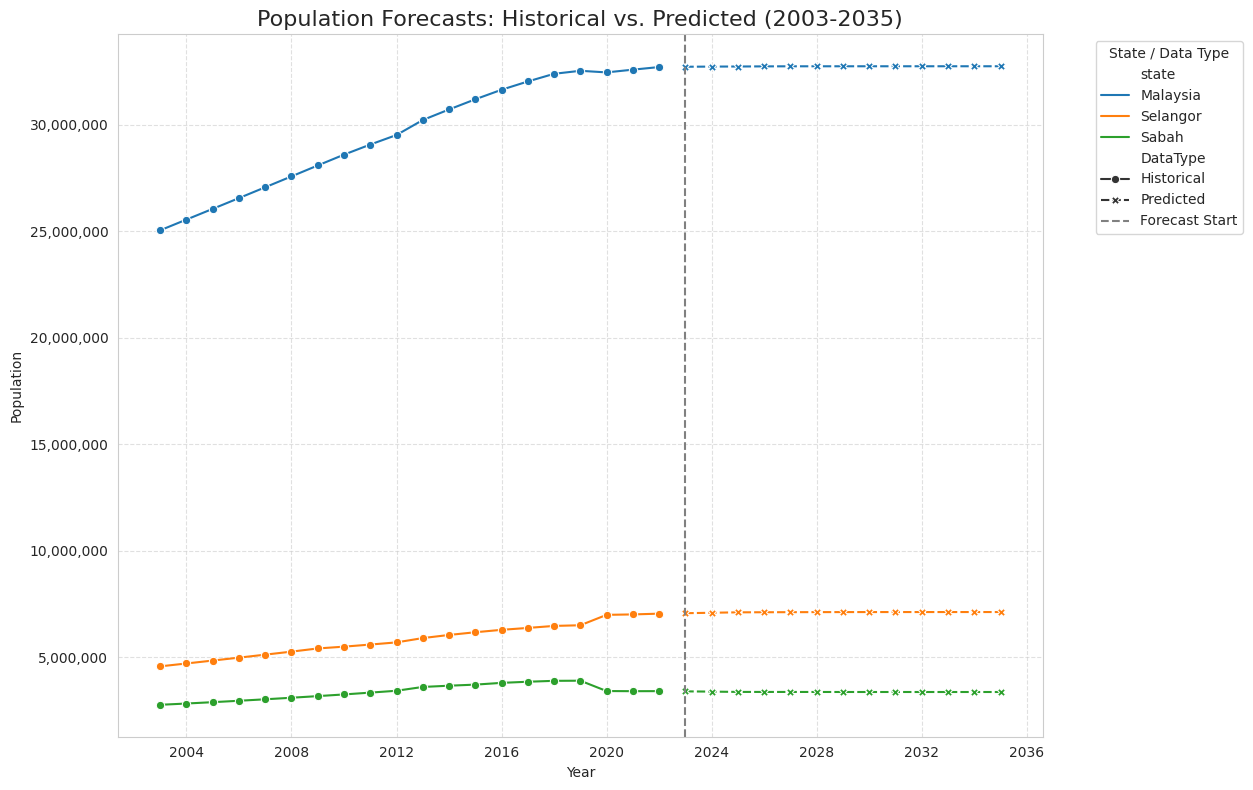

In [ ]:
# --- Visualize Population Forecasts ---
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Load data if running in a new session, otherwise assumes dataframe is in memory
try:
    population_forecasts_df = pd.read_csv("population_forecasts.csv")
    # Ensure date column is datetime type after loading from CSV
    population_forecasts_df['date'] = pd.to_datetime(population_forecasts_df['date'])
except FileNotFoundError:
    print("Error: population_forecasts.csv not found. Please run the forecasting code first.")
    # If running in the same session, the dataframe should exist, so continue

# Set plot style
sns.set_style("whitegrid")

plt.figure(figsize=(15, 8))
ax = plt.gca()

# Plot Population forecasts
sns.lineplot(data=population_forecasts_df,
             x='date',
             y='population',
             hue='state',          # Color lines by state
             style='DataType',     # Use style (solid/dashed) for Historical/Predicted
             markers=True,         # Add markers for data points
             ax=ax)

# Add a vertical line at the end of the historical period (start of 2023)
forecast_start_date = pd.to_datetime('2023-01-01')
ax.axvline(forecast_start_date, color='gray', linestyle='--', lw=1.5, label='Forecast Start')

# Improve labels and title
ax.set_title('Population Forecasts: Historical vs. Predicted (2003-2035)', fontsize=16)
ax.set_xlabel('Year')
ax.set_ylabel('Population') # Assuming original population numbers, not millions here

# Format y-axis labels for large numbers
ax.get_yaxis().set_major_formatter(plt.FuncFormatter(lambda x, p: format(int(x), ',')))


# Improve legend placement
plt.legend(title='State / Data Type', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout(rect=[0, 0, 0.85, 1]) # Adjust layout to make space for legend
plt.show()

# Save the figure
# plt.savefig("population_forecasts_plot.png", dpi=300)

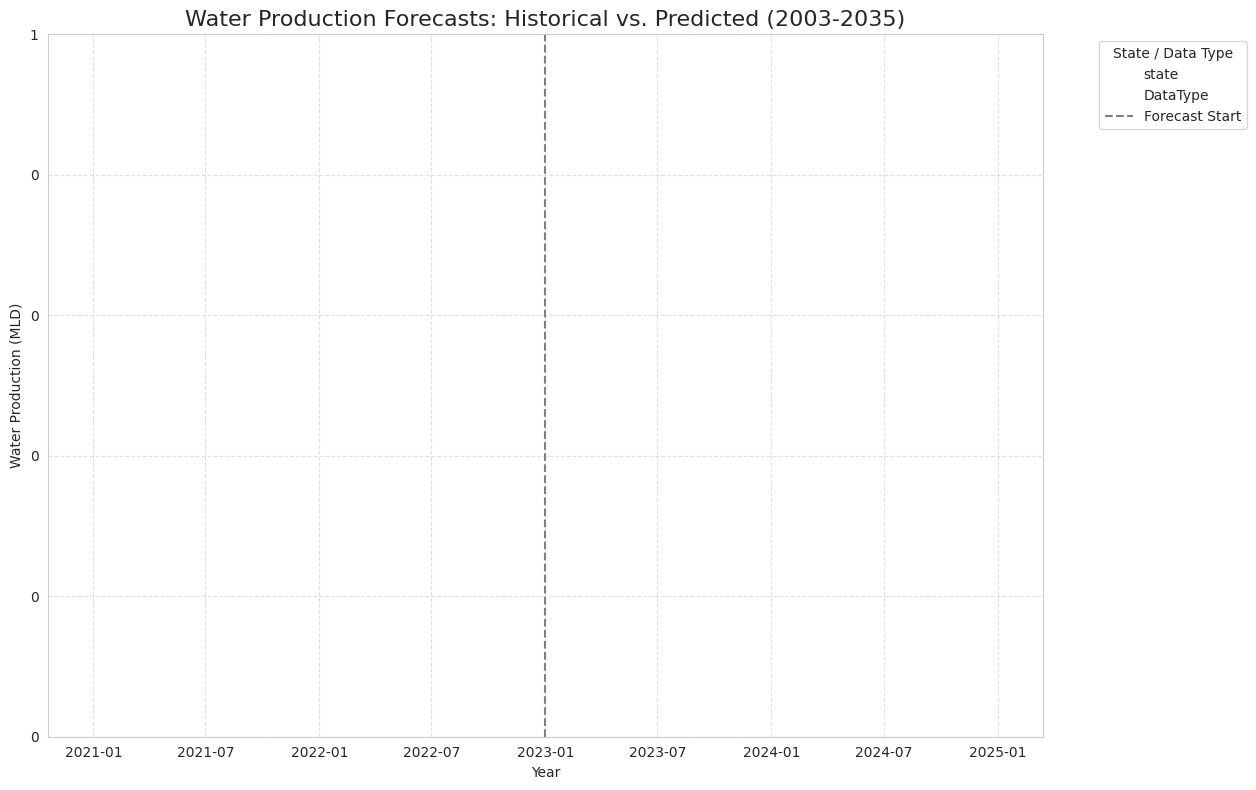

In [ ]:
# --- Visualize Water Production Forecasts ---
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Load data if running in a new session
try:
    production_forecasts_df = pd.read_csv("production_forecasts.csv")
    production_forecasts_df['date'] = pd.to_datetime(production_forecasts_df['date'])
except FileNotFoundError:
    print("Error: production_forecasts.csv not found. Please run the forecasting code first.")
    # If running in the same session, the dataframe should exist

# Set plot style
sns.set_style("whitegrid")

plt.figure(figsize=(15, 8))
ax = plt.gca()

# Plot Production forecasts
sns.lineplot(data=production_forecasts_df,
             x='date',
             y='production_mld',
             hue='state',
             style='DataType',
             markers=True,
             ax=ax)

# Add a vertical line at the end of the historical period
forecast_start_date = pd.to_datetime('2023-01-01')
ax.axvline(forecast_start_date, color='gray', linestyle='--', lw=1.5, label='Forecast Start')

# Improve labels and title
ax.set_title('Water Production Forecasts: Historical vs. Predicted (2003-2035)', fontsize=16)
ax.set_xlabel('Year')
ax.set_ylabel('Water Production (MLD)')

# Format y-axis labels
ax.get_yaxis().set_major_formatter(plt.FuncFormatter(lambda x, p: format(int(x), ',')))


# Improve legend placement
plt.legend(title='State / Data Type', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout(rect=[0, 0, 0.85, 1]) # Adjust layout for legend
plt.show()

# Save the figure
# plt.savefig("production_forecasts_plot.png", dpi=300)

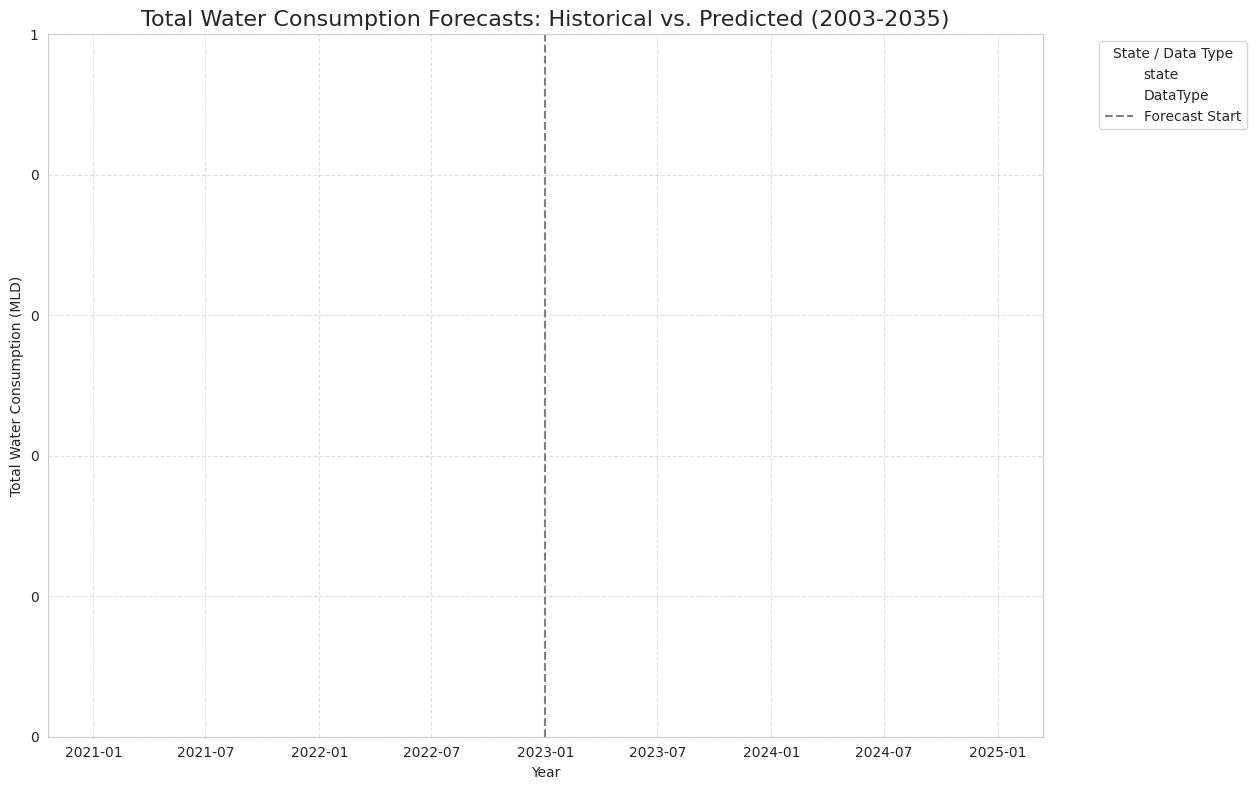

In [ ]:
# --- Visualize Total Water Consumption Forecasts ---
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Load data if running in a new session
try:
    consumption_forecasts_df = pd.read_csv("consumption_forecasts.csv")
    consumption_forecasts_df['date'] = pd.to_datetime(consumption_forecasts_df['date'])
except FileNotFoundError:
    print("Error: consumption_forecasts.csv not found. Please run the forecasting code first.")
    # If running in the same session, the dataframe should exist

# Set plot style
sns.set_style("whitegrid")

plt.figure(figsize=(15, 8))
ax = plt.gca()

# Plot Consumption forecasts
sns.lineplot(data=consumption_forecasts_df,
             x='date',
             y='consump_total_mld',
             hue='state',
             style='DataType',
             markers=True,
             ax=ax)

# Add a vertical line at the end of the historical period
forecast_start_date = pd.to_datetime('2023-01-01')
ax.axvline(forecast_start_date, color='gray', linestyle='--', lw=1.5, label='Forecast Start')

# Improve labels and title
ax.set_title('Total Water Consumption Forecasts: Historical vs. Predicted (2003-2035)', fontsize=16)
ax.set_xlabel('Year')
ax.set_ylabel('Total Water Consumption (MLD)')

# Format y-axis labels
ax.get_yaxis().set_major_formatter(plt.FuncFormatter(lambda x, p: format(int(x), ',')))

# Improve legend placement
plt.legend(title='State / Data Type', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout(rect=[0, 0, 0.85, 1]) # Adjust layout for legend
plt.show()

# Save the figure
# plt.savefig("consumption_forecasts_plot.png", dpi=300)